In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1UE1HEGfR5-osz4hZPu6NX2uoDYHxGCBx/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1b58j0ZyfagGM67nuLeaPXmX-sgi0aIzC/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1gNY2RjQLbFvjGWtL_bDe9vE_fc4CiWPd/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1gch9sy3JyajPsA5JISAlRirqRBlbQ4-E/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
# products_categories.csv
# url = "https://drive.google.com/file/d/1HEML0_IQq0fhilVTWKiMxk7BvHH1Be4o/view?usp=sharing"
# path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
# products_categories = pd.read_csv(path)

In [4]:
or_df = orders_qu.copy()
ol_df = orderlines_qu.copy()
pr_df = products_cl.copy()
br_df = brands.copy()
# pr_cat_df = products_categories.copy()

What is the period that the dataset covers?

In [5]:
print(f"first created order: {or_df.created_date.min()}"),
print(f"last created order: {or_df.created_date.max()}"),
print(f"first processing date: {ol_df.date.min()}"),
print(f"last processing date: {ol_df.date.max()}")

first created order: 2017-01-01 01:51:47
last created order: 2018-03-14 12:03:52
first processing date: 2017-01-01 01:46:16
last processing date: 2018-03-14 11:58:13


What is the overall revenue for that time?

In [6]:
ol_df['unit_price_total'] = ol_df['unit_price'] * ol_df['product_quantity']

In [7]:
print(f"The overall revenue from 01/01/2017 to 14/03/2018 is: {ol_df.unit_price_total.sum()} Euros")

The overall revenue from 01/01/2017 to 14/03/2018 is: 8034161.929999999 Euros


Are there seasonal patterns in the evolution of sales?

In [8]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

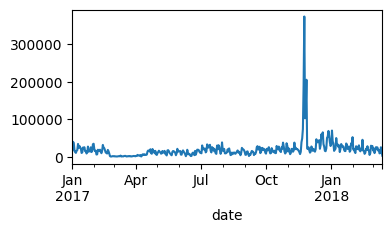

In [9]:
(
    ol_df
    .resample("D", on="date")
    .sum()["unit_price_total"]
    .plot(figsize=(4,2))
 );

In [10]:
or_df["created_date"] = pd.to_datetime(or_df["created_date"])

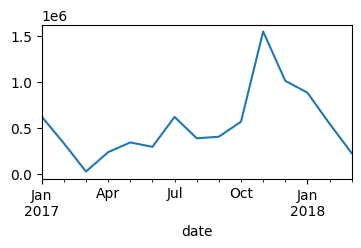

In [11]:
(
    ol_df
    .resample("M", on="date")
    .sum()["unit_price_total"]
    .plot(figsize=(4,2))
 );

The main investors in the Board are worried about offering aggressive discounts. They have pointed out how **the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue.** They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.

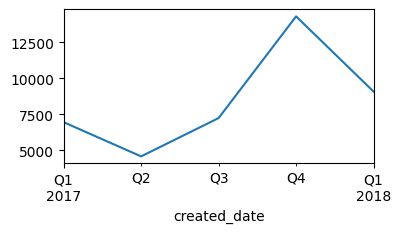

In [12]:
(
    or_df
    .resample("Q", on="created_date")
    .count()["order_id"]
    .plot(figsize=(4,2))
  );

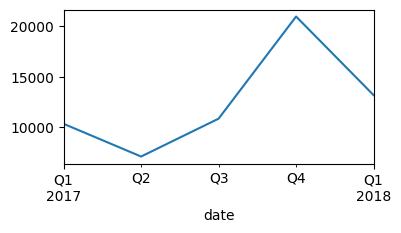

In [13]:
(
    ol_df
    .resample("Q", on="date")
    .sum()["product_quantity"]
    .plot(figsize=(4,2))
  );

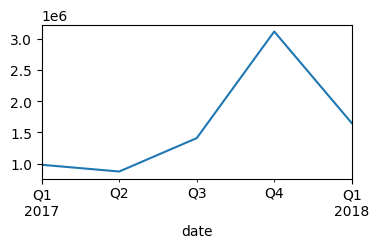

In [14]:
(
    ol_df
    .resample("Q", on="date")
    .sum()["unit_price_total"]
    .plot(figsize=(4,2))
  );

What are the most sold products?

In [15]:
top_10_products_qty = ol_df.groupby('sku', as_index = False)['product_quantity'].sum().nlargest(10, 'product_quantity')
top_10_products = top_10_products_qty['sku']
top_10_products

451     APP1190
366     APP0698
656     APP1922
384     APP0927
5021    WDT0183
1246    CRU0051
4001    SAM0074
2958    NTE0013
771     APP2446
1245    CRU0050
Name: sku, dtype: object

In [16]:
top_products = pr_df.loc[products_cl['sku'].isin(top_10_products)] #this is top 10 by quantity

In [17]:
top_products.merge(
    top_10_products_qty,
    how="inner",
    on="sku").sort_values(by = 'product_quantity', ascending = False)[['name', 'desc']]

,name,desc
5,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.
2,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...
7,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...
4,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...
0,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...
6,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...
3,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...
1,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...
9,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray
8,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...


What are the products that generate the most revenue?

In [18]:
total_revenue = ol_df.groupby('sku', as_index = False)['unit_price_total'].sum().nlargest(10, 'unit_price_total').rename(columns = {'unit_price_total': 'total_revenue'})

In [19]:
top_10_revenue = ol_df.groupby('sku', as_index = False)['unit_price_total'].sum().nlargest(10, 'unit_price_total')
top_10_revenue = top_10_revenue['sku']
top_10_revenue

2423    LGE0044
771     APP2446
656     APP1922
788     APP2477
667     APP1970
709     APP2072
797     APP2485
5021    WDT0183
795     APP2483
790     APP2479
Name: sku, dtype: object

In [20]:
products_rev = pr_df.loc[pr_df['sku'].isin(top_10_revenue)].sort_values(by = 'price', ascending = False) #this is top 10 by revenue

In [21]:
products_rev.merge(
    total_revenue,
    how="inner",
    on="sku").sort_values(by = 'total_revenue', ascending = False)[['name', 'desc']]

,name,desc
5,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...
6,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray
8,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...
3,Apple iPhone 64GB Space Gray 8,Apple iPhone 64GB 8 Color Space Gray
7,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.
0,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...
2,Apple iPhone 8 Plus 64GB Gold,Apple iPhone 8 Plus 64GB Gold color
9,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...
1,Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray
4,Apple iPhone 64GB Gold 8,Apple iPhone 64GB 8 in Gold


In [22]:
pr_df.price.mean().round(2) # Average product price

662.88

In [23]:
ol_df.unit_price.mean().round(2) # Average unit price (sold price)

134.33

In [24]:
or_df.total_paid.mean().round(2) # Average order price with shipping cost

194.87

In [25]:
ol_df.groupby('id_order')['unit_price_total'].sum().mean().round(2) # Average order price without shipping cost

190.41

Categories

In [26]:
category_type_df = pr_df.copy()

In [27]:
top_35_type = list(category_type_df.groupby("type", as_index = False).count().nlargest(35, "sku")['type'])
top_35_type

['11865403',
 '12175397',
 '1298',
 '11935397',
 '11905404',
 '1282',
 '12635403',
 '13835403',
 '5,74E+15',
 '1364',
 '12585395',
 '1296',
 '1325',
 '5384',
 '1433',
 '12215397',
 '5398',
 '1,44E+11',
 '57445397',
 '1,02E+12',
 '1334',
 '1229',
 '2158',
 '2449',
 '12655397',
 '12995397',
 '1515',
 '13615399',
 '13555403',
 '1405',
 '1230',
 '118692158',
 '21485407',
 '1216',
 '24885185']

In [28]:
type_category = {
    "type": top_35_type,

    "category": ['Cases', 'Storage Devices', 'Accessories', 'Storage Devices', 'Accessories', 'Laptops / Desktops', 'Cases',
    'Cases', 'Desktop PCs', 'Computer Components', 'Cables / Adapters', 'Monitors', 'Cables / Adapters', 'Headphones', 'Computer Components',
    'Computer Components', 'Speakers', 'Laptops', 'Repairs', 'Storage Devices', 'Network', 'Laptops / Desktops',
    'Smartwatch Accessories', 'Storage Devices', 'Pointer / Pens', 'Storage Devices', 'Battery', 'Charger', 'Screen Protectors',
    'Drawing Tablets', 'Cables / Adapters', 'Desktops', 'Photo & Video Accessories', 'Smartwatches', 'Smartwatches']
}

In [29]:
type_category_df = pd.DataFrame(type_category)
type_category_df

,type,category
0,11865403,Cases
1,12175397,Storage Devices
2,1298,Accessories
3,11935397,Storage Devices
4,11905404,Accessories
5,1282,Laptops / Desktops
6,12635403,Cases
7,13835403,Cases
8,"5,74E+15",Desktop PCs
9,1364,Computer Components


In [30]:
import numpy as np

In [31]:
type_category_df.set_index('type', inplace=True)
category_type_df['categories'] = category_type_df['type'].map(type_category_df['category']).fillna('Other')

In [32]:
type_category_df.reset_index()

,type,category
0,11865403,Cases
1,12175397,Storage Devices
2,1298,Accessories
3,11935397,Storage Devices
4,11905404,Accessories
5,1282,Laptops / Desktops
6,12635403,Cases
7,13835403,Cases
8,"5,74E+15",Desktop PCs
9,1364,Computer Components


In [33]:
category_type_df.query('categories == "Other"').sample(10)

,sku,name,desc,price,promo_price,in_stock,type,promo_price_new,discount,categories
8236,APP2476,Apple 128GB iPod Touch Gray Space,6th generation iPod Touch 128GB with 8 megapix...,342.81,3.290.014,0,11821715,329.000,4.03,Other
6956,APP2040,Open - Apple iPhone 7 Plus 256GB Black - Like New,Apple iPhone 7 Plus Free 256 GB Black (MN4W2QL...,1129.00,960.331,0,85651716,960.331,14.94,Other
3715,NOM0016,Nomad Pod Battery Charging Dock Apple Watch Gr...,portable charging station and aluminum Apple W...,59.95,549.897,0,24215399,55.000,8.26,Other
10015,NET0037,Arlo Netgear Pro 4 camera security system,4 Security Cameras Intelligent rechargeable 10...,969.99,932.99,0,9094,932.990,3.81,Other
57,MOP0013,Mophie Juice Pack Air Battery Case iPhone 4 / ...,Case Battery (1500mAh) iPhone 4 / 4S polymer.,69.95,539.902,0,"5,49E+11",54.000,22.80,Other
4564,THU0033,Subterra Thule Attaché case for MacBook and iPad,zipper bag and shoulder bag for MacBook Pro 97...,69.95,649.899,1,10230,65.000,7.08,Other
184,APP0422,Apple iPod Touch 64GB yellow,New 5 generation iPod touch 64GB yellow.,339.00,3.219.931,0,11821715,322.000,5.01,Other
10042,BOD0002-A,Open - BodyGuardz TrainR Pro iPhone Case with ...,Advanced holster included sports armband for i...,39.99,212.578,0,5405,21.000,47.49,Other
3653,MIC0036,Office 365 Personal 1 license 1 M ± or,Personal license with subscription of 365 days...,69.90,689.906,1,1416,69.000,1.29,Other
607,MOP0033,Mophie Juice Pack Helium (1500mAh) battery cov...,IPhone Battery Case SE / 5s / 5 plastic and me...,79.99,62.989,0,"5,49E+11",62.989,21.25,Other


In [34]:
ol_df.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'unit_price_total'],
      dtype='object')

#Analyse the last 20 percent of categories from 35top Analysis

In [35]:
done_categories = ['11865403', '12175397', '1298', '11935397', '11905404', '1282', '12635403', '13835403', '5','74E+15', '1364', '12585395' ,'1296',\
                   '1325', '5384', '1433', '12215397', '5398', '1.02E+12', '1.44E+11', '57445397', '1334', '2158', '2449', '12655397', '122', '12995397',\
                   '1515', '13615399', '13555403', '1405', '1230', '118692158', '1216', '24885185', '24895185']

In [36]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              10110 non-null  object 
 1   name             10110 non-null  object 
 2   desc             10110 non-null  object 
 3   price            10110 non-null  float64
 4   promo_price      10110 non-null  object 
 5   in_stock         10110 non-null  int64  
 6   type             10110 non-null  object 
 7   promo_price_new  10110 non-null  float64
 8   discount         10110 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 711.0+ KB


In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = stopwords.words('english')

# Filter the DataFrame to include only rows where the 'type' column has a length of 4 digits
filtered_products = pr_df[~pr_df['type'].isin(done_categories)]

# Group the filtered DataFrame by unique entries in the 'type' column
grouped_products = filtered_products.groupby('type')

most_used_words_per_type = {}

for group_name, group_data in grouped_products:
    # Combine the 'name' and 'desc' columns
    group_text = group_data['name'] + ' ' + group_data['desc']

    # Apply text preprocessing and remove stopwords, digits, and short words
    group_text = group_text.apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words and word.lower() != 'apple']))
    group_text = group_text.str.replace(r'\d+', '')
    group_text = group_text.str.replace(r'\b\w{1,3}\b', '')

    # Concatenate the text values from the group into a single string
    all_text = ' '.join(group_text)

    # Remove punctuation and convert to lowercase
    clean_text = re.sub(r'[^\w\s]', '', all_text.lower())

    # Split the string into individual words
    words = clean_text.split()

    # Calculate the frequency of each word
    word_counts = Counter(words)

    # Retrieve the most frequent word for the group (excluding 'apple')
    most_used_words = [word for word, frequency in word_counts.most_common(100) if word.lower() != 'apple']

    # Store the most used word for the group
    most_used_words_per_type[group_name] = most_used_words[0] if most_used_words else None

most_used_words_per_type
most_used_words2 = pd.DataFrame(most_used_words_per_type.items(), columns=['type', 'most_used_word'])

most_used_words2.set_index('type', inplace = True)
most_used_words2['item_count']= pr_df.groupby('type').size()
most_used_words2.sort_values('item_count', ascending = False)
most_used_words2.reset_index()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,type,most_used_word,item_count
0,"1,02E+12",macbook,130
1,"1,44E+11",repair,159
2,"1,46E+11",repair,6
3,10142,battery,23
4,101781405,wacom,10
...,...,...,...
90,85641716,iphone,32
91,85651716,iphone,42
92,8696,macbook,57
93,"9,29E+11",macbook,1


In [38]:
products_categories2= category_type_df.merge(most_used_words2,
              how='left',
              on='type')


products_categories2

products_categories2.groupby('most_used_word')['price'].count().sort_values(ascending = False)


most_used_word
iphone          422
macbook         414
imac            360
ipad            216
repair          165
pointer         107
watch            70
battery          68
camera           64
ipod             61
keyboard         60
adapter          52
lightning        44
core             37
synology         32
strip            31
gopro            28
adobe            24
mouse            23
card             19
case             19
wireless         14
installation     12
recorder         10
wacom            10
applecare        10
microphone        9
mini              7
remote            7
player            6
spray             6
protector         5
bluetooth         5
security          5
expansion         5
connector         4
homekit           4
adhesive          3
open              1
Name: price, dtype: int64

##Assigning the categories back

In [39]:
products_categories2.loc[products_categories2['type']== '12585395']

,sku,name,desc,price,promo_price,in_stock,type,promo_price_new,discount,categories,most_used_word,item_count
488,KAN0013,IAdapt Kanex Mini DisplayPort to HDMI with Aud...,Adapter Cable Display Port to HDMI.,27.99,159.902,1,12585395,16.0,42.84,Cables / Adapters,NaN,NaN
708,SNN0024,Sonnet Echo ExpressCard / 34 Thunderbolt Adapt...,Thunderbolt Adapter ExpressCard / 34 Mac.,180.29,1.799.899,0,12585395,180.0,0.16,Cables / Adapters,NaN,NaN
919,KAN0027,Kanex adapter Thunderbolt to eSATA + USB 3.0,Thunderbolt adapter cable to eSATA + USB 3.0.,104.99,999.896,1,12585395,100.0,4.75,Cables / Adapters,NaN,NaN
1104,KAN0032,IAdapt Kanex Mini DisplayPort to VGA Adapter,Cable Adapter Mini Display Port to VGA.,24.95,209.899,1,12585395,21.0,15.83,Cables / Adapters,NaN,NaN
1105,KAN0031,IAdapt Kanex Mini DisplayPort to DVI-D,Cable Adapter Mini Display Port to DVI-D.,24.95,169.896,1,12585395,17.0,31.86,Cables / Adapters,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9971,SAT0056-A,Open - Satechi USB 3.0 Hub 10/3 charging ports...,USB 3.0 Hub Refurbished 10-port 7 for data tra...,59.99,374.752,0,12585395,37.0,38.32,Cables / Adapters,NaN,NaN
10039,STA0035-A,Open - Startech USB Hub-C or VGA to HDMI 4K US...,Hub with USB-C connection VGA port or HDMI 4K ...,123.99,692.247,0,12585395,69.0,44.35,Cables / Adapters,NaN,NaN
10043,OWC0227-A,Open - OWC USB Dock-C 10-port power 80W Plata,Aluminum Hub with 10 different ports include 2...,217.99,1.384.622,0,12585395,138.0,36.69,Cables / Adapters,NaN,NaN
10049,MOS0246,Moshi adapter multi-port USB-C Plata,USB 3.1 for Mac multi-port adapter with HDMI a...,59.00,589.996,0,12585395,59.0,0.00,Cables / Adapters,NaN,NaN


In [40]:
missing_values = products_categories2["most_used_word"].isnull().sum()
print("Number of missing values in 'most_used_word':", missing_values)

Number of missing values in 'most_used_word': 7671


In [41]:
products_categories2["categories"] = products_categories2["categories"].fillna("")
products_categories2["most_used_word"] = products_categories2["most_used_word"].fillna("")
products_categories2.loc[products_categories2["most_used_word"].str.contains("keyboard", case=False), "categories"] = "Keyboard"
products_categories2.loc[products_categories2["most_used_word"].str.contains("mouse", case=False), "categories"] = "Mouse"
products_categories2.loc[products_categories2["most_used_word"].str.contains("repair", case=False), "categories"] = "Repairs"
products_categories2.loc[products_categories2["most_used_word"].str.contains("adapter", case=False), "categories"] = "Cables / Adapters"
products_categories2.loc[products_categories2["most_used_word"].str.contains("pointer", case=False), "categories"] = "Pointer / Pens"
products_categories2.loc[products_categories2["most_used_word"].str.contains("battery", case=False), "categories"] = "Battery"
products_categories2.loc[products_categories2["most_used_word"].str.contains("core", case=False), "categories"] = "Laptops / Desktops"
products_categories2.loc[products_categories2["most_used_word"].str.contains("ipod", case=False), "categories"] = "iPod / MP3Players"
products_categories2.loc[products_categories2["most_used_word"].str.contains("lightning", case=False), "categories"] = "Storage Devices"
products_categories2.loc[products_categories2["most_used_word"].str.contains("case", case=False), "categories"] = "Cases"
products_categories2.loc[products_categories2["most_used_word"].str.contains("strip", case=False), "categories"] = "Travel Accessories"
products_categories2.loc[products_categories2["most_used_word"].str.contains("applecare", case=False), "categories"] = "Warranty"
products_categories2.loc[products_categories2["most_used_word"].str.contains("gopro", case=False), "categories"] = "Photo & Video Accessories"
products_categories2.loc[products_categories2["most_used_word"].str.contains("card", case=False), "categories"] = "Computer Components"
products_categories2.loc[products_categories2["most_used_word"].str.contains("protector", case=False), "categories"] = "Smartwatch Accessories"
products_categories2.loc[products_categories2["most_used_word"].str.contains("wireless", case=False), "categories"] = "Charger"
products_categories2.loc[products_categories2["most_used_word"].str.contains("bluetooth", case=False), "categories"] = "Keyboard"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("ipad", case=False) & (products_categories2["price"] > 200)), "categories"] = "Tablets"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("ipad", case=False) & (products_categories2["price"] < 200)), "categories"] = "Tablet Accessories"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("imac", case=False) & (products_categories2["price"] > 1000)), "categories"] = "Laptops / Desktops"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("imac", case=False) & (products_categories2["price"] < 1000)), "categories"] = "Computer Accessories"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("macbook", case=False) & (products_categories2["price"] > 1000)), "categories"] = "Laptops / Desktops"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("macbook", case=False) & (products_categories2["price"] < 1000)), "categories"] = "Computer Accessories"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("iphone ", case=False) & (products_categories2["price"] > 400)), "categories"] = "Smartphones"
products_categories2.loc[(products_categories2["most_used_word"].str.contains("iphone ", case=False) & (products_categories2["price"] < 400)), "categories"] = "Smartphone Accessories"
products_categories2


,sku,name,desc,price,promo_price,in_stock,type,promo_price_new,discount,categories,most_used_word,item_count
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,50.00,16.65,Computer Accessories,macbook,57.0
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,59.00,0.00,Keyboard,keyboard,35.0
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,57.00,3.39,Mouse,mouse,23.0
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,23.00,8.00,Cables / Adapters,,NaN
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,31.99,8.57,Computer Components,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,27.00,9.97,Other,watch,1.0
10106,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,65.00,7.08,Computer Accessories,macbook,65.0
10107,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,65.00,7.08,Computer Accessories,macbook,65.0
10108,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,65.00,7.08,Computer Accessories,macbook,65.0


In [42]:
products_categories2.loc[products_categories2['categories']== 'Other'].count()

sku                696
name               696
desc               696
price              696
promo_price        696
in_stock           696
type               696
promo_price_new    696
discount           696
categories         696
most_used_word     696
item_count         629
dtype: int64

In [43]:
# from google.colab import files
# products_categories2.to_csv("products_categories.csv", index=False)
# files.download("products_categories.csv")

#Assigning Key Words

In [44]:
keywords_apple = ('iphone', 'ipod', 'apple', 'mac', 'ipad')
keywords_refurbished = ('open', 'refurbished', 'like new', 'reconditioned', 'second hand', 'Like new', 'Second hand')

def find_matching_keywords(row):
    desc = str(row['desc']).lower()
    name = str(row['name']).lower()

    matching_keywords = []

    for keyword in keywords_apple:
        if keyword in desc or keyword in name:
            matching_keywords.append(keyword)

    for keyword in keywords_refurbished:
        if keyword in desc or keyword in name:
            matching_keywords.append(keyword)

    return matching_keywords

products_categories2['keyword'] = products_categories2.apply(find_matching_keywords, axis=1)


In [45]:
products_categories2['keyword'] = products_categories2['keyword'].apply(lambda x: ', '.join([str(item) for item in x]))



In [46]:
products_categories2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10110 entries, 0 to 10109
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              10110 non-null  object 
 1   name             10110 non-null  object 
 2   desc             10110 non-null  object 
 3   price            10110 non-null  float64
 4   promo_price      10110 non-null  object 
 5   in_stock         10110 non-null  int64  
 6   type             10110 non-null  object 
 7   promo_price_new  10110 non-null  float64
 8   discount         10110 non-null  float64
 9   categories       10110 non-null  object 
 10  most_used_word   10110 non-null  object 
 11  item_count       2439 non-null   float64
 12  keyword          10110 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


# Analysis

## By category

### Most sold products

In [47]:
top_products.merge(
    top_10_products_qty,
    how="inner",
    on="sku").sort_values(by = 'product_quantity', ascending = False)[['name', 'desc', 'sku']]

,name,desc,sku
5,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,APP1190
2,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,APP0698
7,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,APP1922
4,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,APP0927
0,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,WDT0183
6,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,CRU0051
3,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,SAM0074
1,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,NTE0013
9,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,APP2446
8,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,CRU0050


### Discounts

In [48]:
ol_df["short"] = ol_df["sku"].str[:3]

In [49]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                on="short"
                                )
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,APP,Apple


In [50]:
discounts_df = ol_with_brands_df[['id_order', 'date', 'product_quantity', 'unit_price', 'sku', 'long', 'unit_price_total']].merge(products_categories2[['name', 'categories', 'price', 'promo_price_new', 'sku', 'keyword']], how = 'inner', on = 'sku')

In [51]:
# discounts_df.drop(columns=['sku'], inplace = True)

In [52]:
discounts_df.rename(columns={"product_quantity" : "qty", "categories" : "category", "promo_price_new" : "promo_price", "long" : "brand",\
                             "unit_price_total" : "revenue"}, inplace=True)
discounts_df.head(1)

,id_order,date,qty,unit_price,sku,brand,revenue,name,category,price,promo_price,keyword
0,299545,2017-01-01 01:46:16,1,47.49,OWC0100,OWC,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Cables / Adapters,60.99,50.0,mac


In [53]:
discounts_df['discount'] = (discounts_df['price'] - discounts_df['unit_price']).round(2)
discounts_df['percentage'] = ((discounts_df['discount'] / discounts_df['price']) * 100).round(2)

In [54]:
discounts_df.head(1)

,id_order,date,qty,unit_price,sku,brand,revenue,name,category,price,promo_price,keyword,discount,percentage
0,299545,2017-01-01 01:46:16,1,47.49,OWC0100,OWC,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Cables / Adapters,60.99,50.0,mac,13.5,22.13


In [55]:
# Average discount in euros (discount) and in % (percentage)
discounts_df[['discount', 'percentage']].mean().round(2)

discount      30.24
percentage    22.05
dtype: float64

In [56]:
discounts_cat_total = (
discounts_df.groupby("category", as_index=False)
.agg({'discount': "mean", 'percentage' : "mean"})
).round(2).sort_values(by = 'discount', ascending = False)

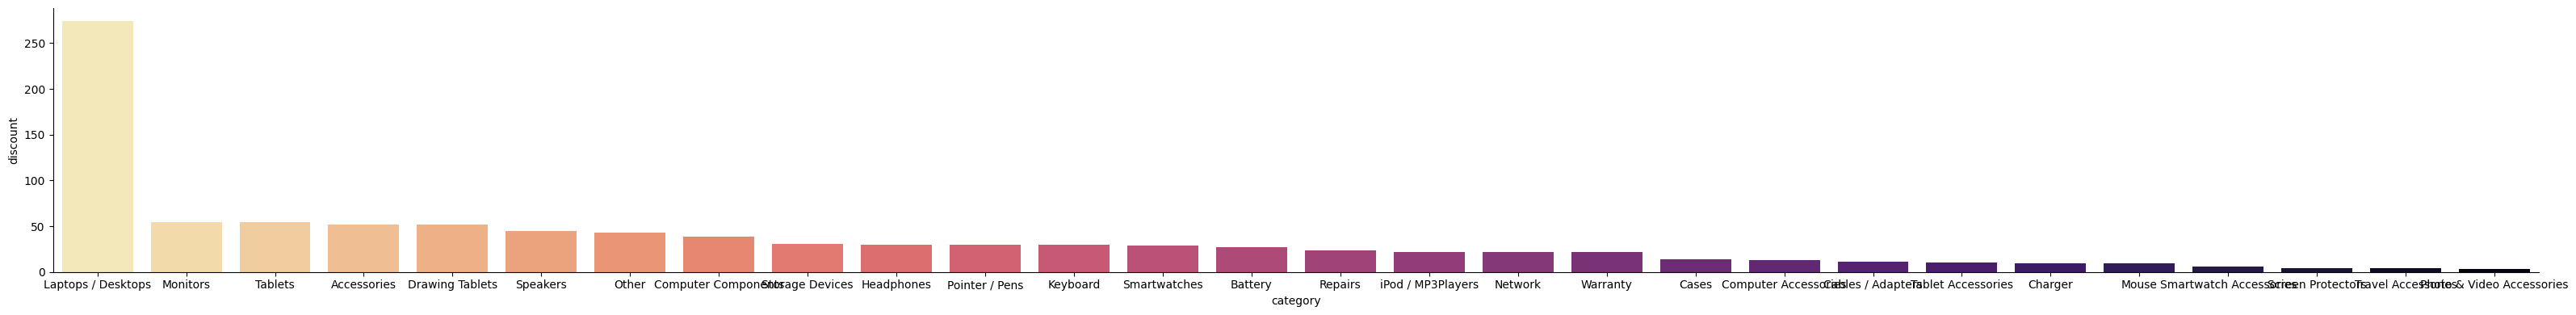

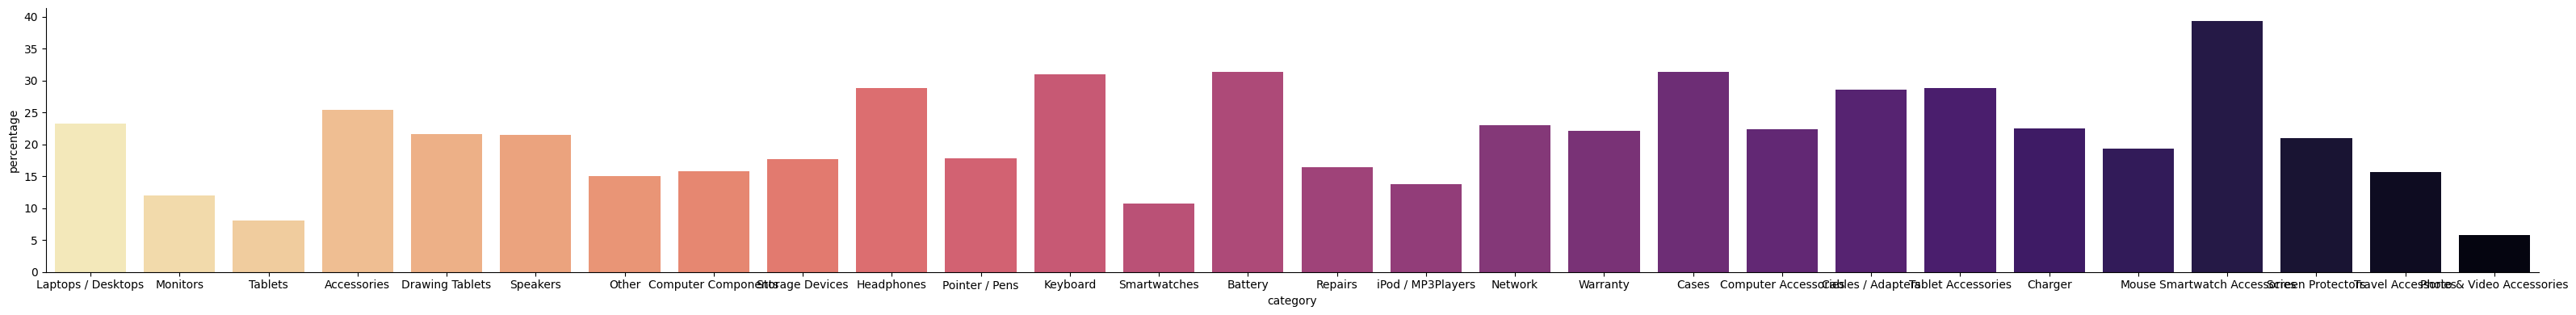

In [57]:
sns.catplot(kind="bar",
            data = discounts_cat_total,
            x="category",
            y = "discount",
            height = 4,
            aspect=8,
            palette="magma_r"),
sns.catplot(kind="bar",
            data = discounts_cat_total,
            x="category",
            y = "percentage",
            height = 4,
            aspect=8,
            palette="magma_r");

In [58]:
top_10_discounts_cat = (
discounts_df.groupby("category", as_index=False)
.agg({'discount': "mean", 'percentage' : "mean"})
.nlargest(10, "discount")
).round(2)

In [59]:
# Average discount in euros (discount) and in % (percentage) for the most discounted categories
top_10_discounts_cat[['discount', 'percentage']].mean().round(2)

discount      67.48
percentage    18.92
dtype: float64

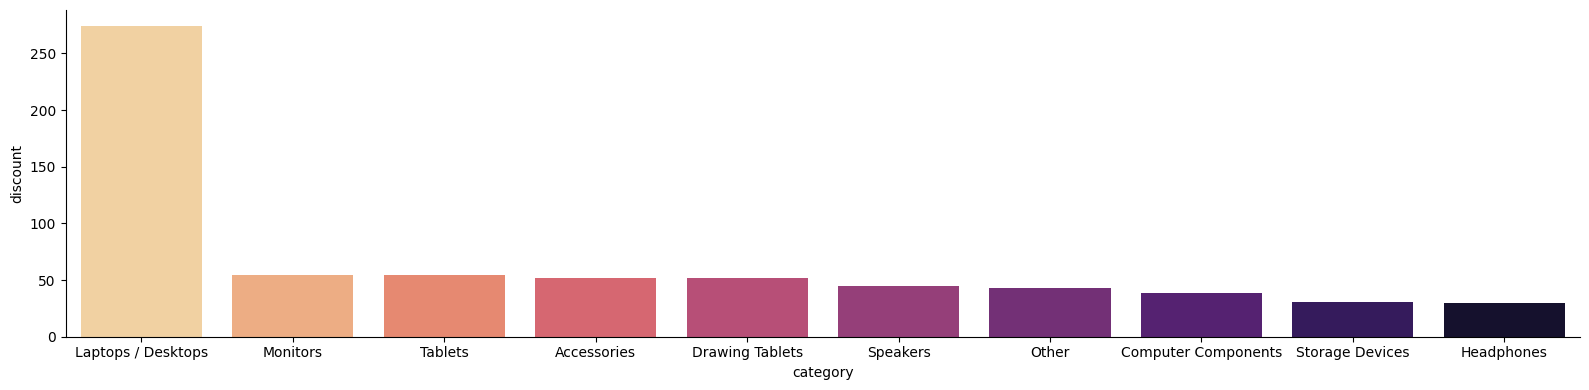

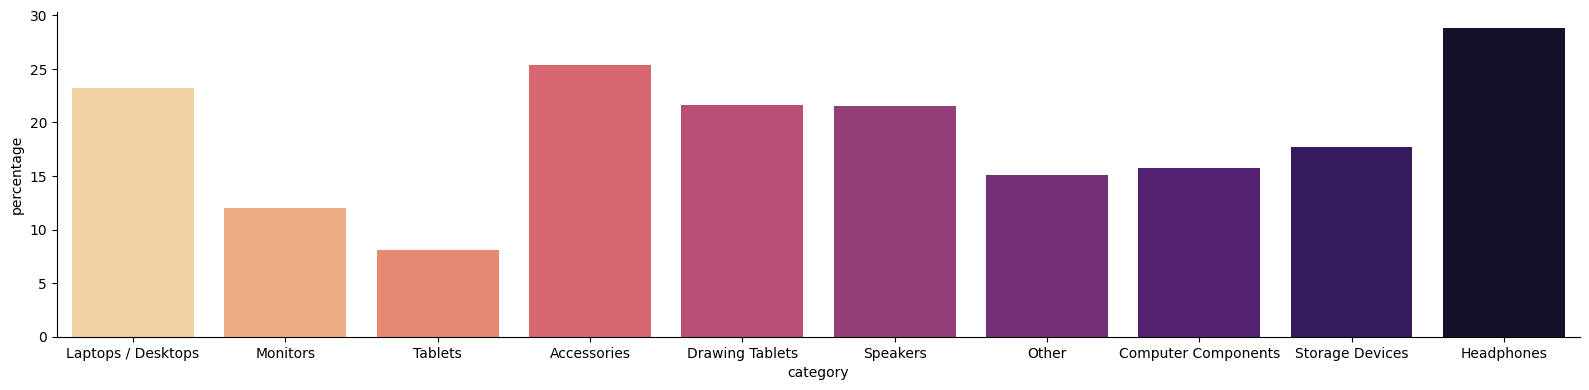

In [60]:
sns.catplot(kind="bar",
            data = top_10_discounts_cat,
            x="category",
            y = "discount",
            height = 4,
            aspect=4,
            palette="magma_r"),
sns.catplot(kind="bar",
            data = top_10_discounts_cat,
            x="category",
            y = "percentage",
            height = 4,
            aspect=4,
            palette="magma_r");

In [61]:
top_10_discounts_cat_per = (
discounts_df.groupby("category", as_index=False)
.agg({'percentage' : "mean"})
.nlargest(10, 'percentage')
).round(2)

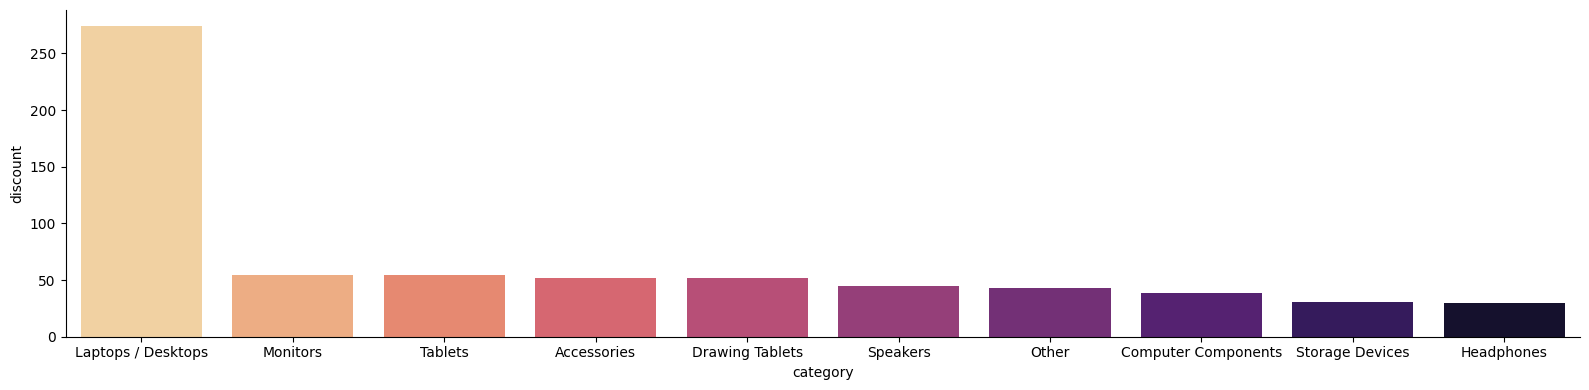

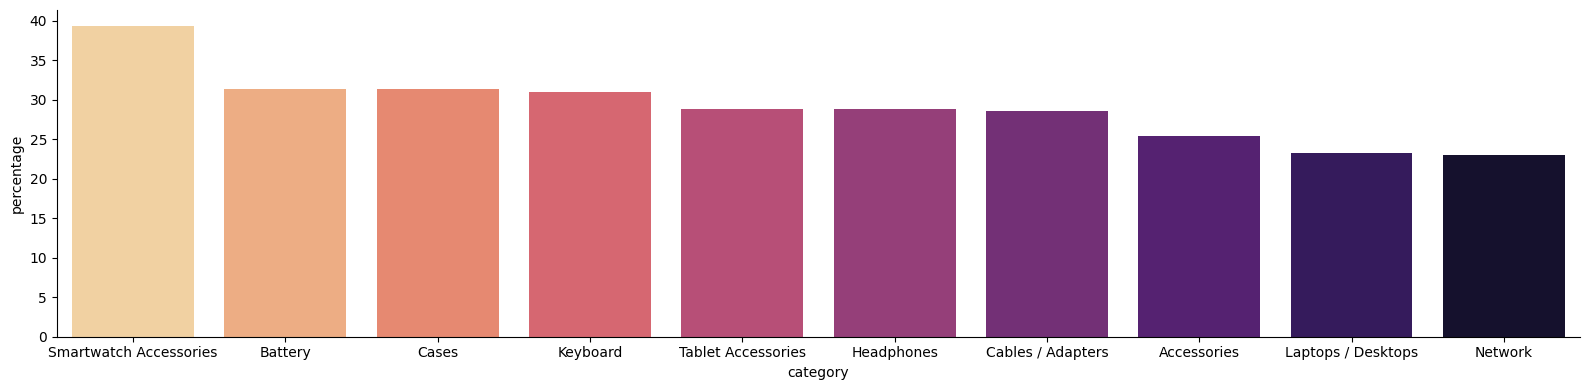

In [62]:
sns.catplot(kind="bar",
            data = top_10_discounts_cat,
            x="category",
            y = "discount",
            height = 4,
            aspect=4,
            palette="magma_r"),
sns.catplot(kind="bar",
            data = top_10_discounts_cat_per,
            x="category",
            y = "percentage",
            height = 4,
            aspect=4,
            palette="magma_r");

In [63]:
disc_products = len(discounts_df.query('discount > 0')['sku'].unique())
disc_products

5038

In [64]:
non_disc_prod = len(discounts_df['sku'].unique()) - disc_products
non_disc_prod

177

In [65]:
disc_products + non_disc_prod

5215

In [66]:
(non_disc_prod / len(discounts_df['sku'].unique())) * 100

3.3940556088207097

In [67]:
(disc_products / len(discounts_df['sku'].unique())) * 100

96.60594439117929

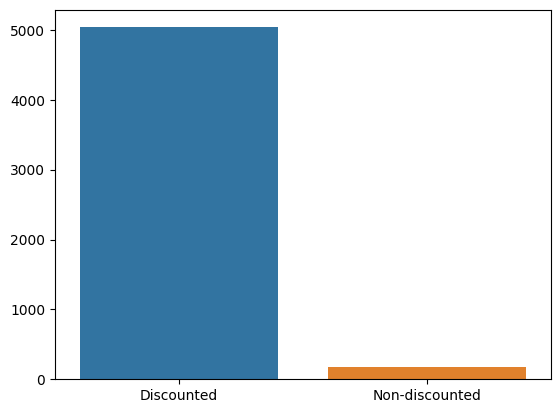

In [68]:
sns.barplot(x=['Discounted', 'Non-discounted'], y=[disc_products, non_disc_prod]);

In [69]:
total_quantity = discounts_df.qty.sum()
total_quantity

62292

In [70]:
(discounts_df.groupby('category', as_index = False)[['qty']].sum().sort_values(by = 'qty', ascending = False).nlargest(10, 'qty')[['qty']].sum() / total_quantity) * 100

qty    78.034097
dtype: float64

In [71]:
total_revenue = 8034161.93

In [72]:
(discounts_df.groupby('category', as_index = False)[['revenue']].sum().sort_values(by = 'revenue', ascending = False).nlargest(10, 'revenue')[['revenue']].sum() / total_revenue) * 100

revenue    83.811212
dtype: float64

In [73]:
cat_qty_rev = (discounts_df.groupby('category', as_index = False)
              .agg({'price' : 'mean', 'unit_price' : 'mean' , 'discount' : 'mean', 'percentage' : 'mean', 'revenue' : 'sum',  'qty' : 'sum'})
              .round(2).sort_values('revenue', ascending = False))

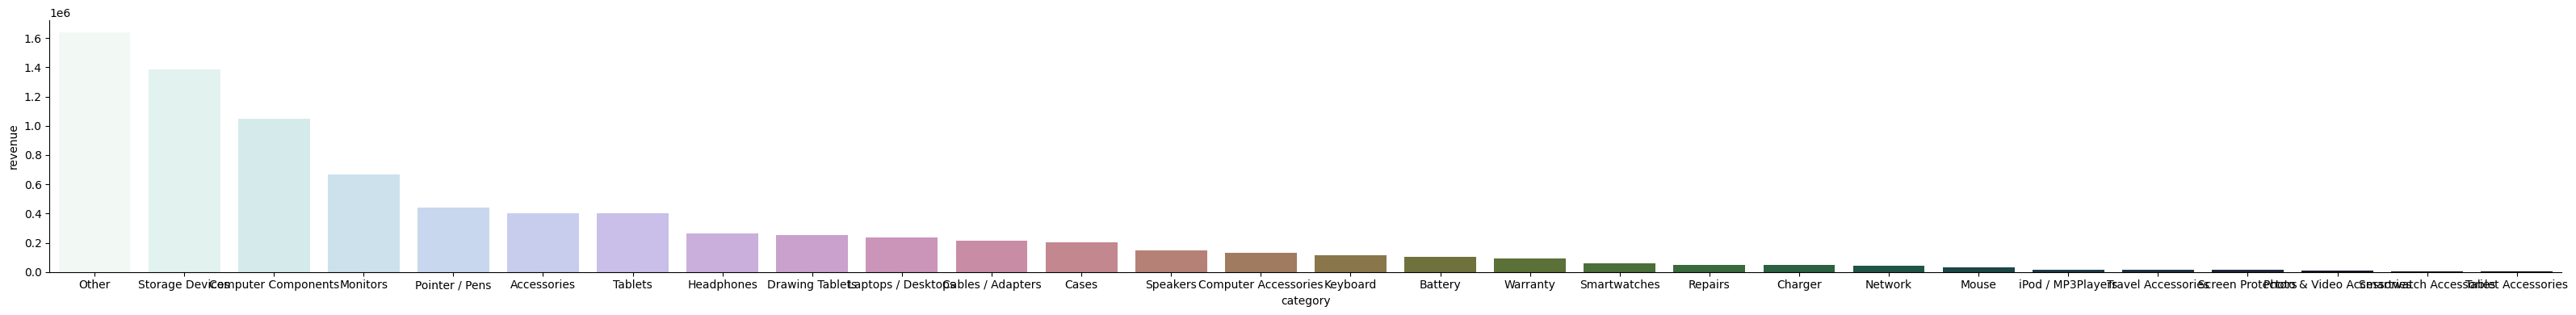

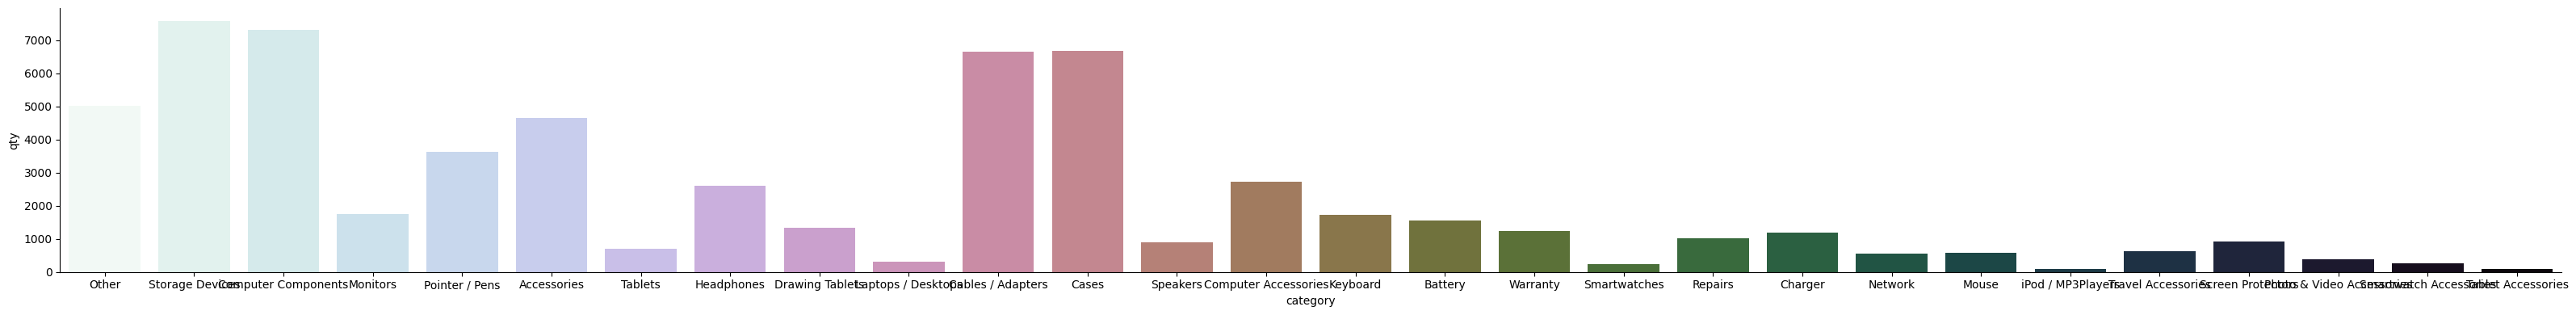

In [74]:
sns.catplot(kind="bar",
            data = cat_qty_rev,
            x="category",
            y = "revenue",
            height = 4,
            aspect=8,
            palette="cubehelix_r"),
sns.catplot(kind="bar",
            data = cat_qty_rev,
            x="category",
            y = "qty",
            height = 4,
            aspect=8,
            palette="cubehelix_r");

In [75]:
top10_cat_qty = (discounts_df.groupby('category', as_index = False)
            .agg({'price' : 'mean', 'unit_price' : 'mean' , 'discount' : 'mean', 'percentage' : 'mean', 'revenue' : 'sum',  'qty' : 'sum'})
            .round(2).sort_values('qty', ascending = False)).head(10)
top10_cat_qty

,category,price,unit_price,discount,percentage,revenue,qty
22,Storage Devices,221.31,190.87,30.44,17.68,1385286.15,7586
6,Computer Components,189.78,151.36,38.42,15.77,1048887.33,7313
3,Cases,44.57,30.66,13.91,31.31,204396.03,6684
2,Cables / Adapters,46.19,34.58,11.61,28.54,216762.09,6655
14,Other,374.01,330.70,43.30,15.09,1640048.30,5012
0,Accessories,144.24,92.31,51.93,25.36,400397.61,4648
16,Pointer / Pens,143.14,113.47,29.67,17.83,439345.10,3627
5,Computer Accessories,61.42,48.80,12.62,22.39,131860.46,2734
8,Headphones,137.02,106.90,30.13,28.84,265033.43,2601
11,Monitors,442.84,388.11,54.73,11.99,665939.42,1749


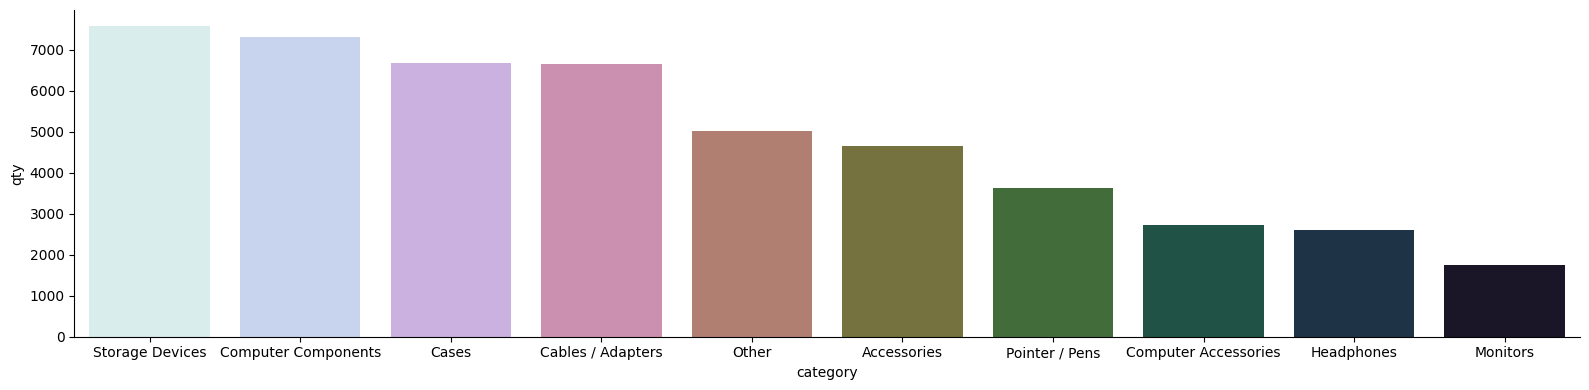

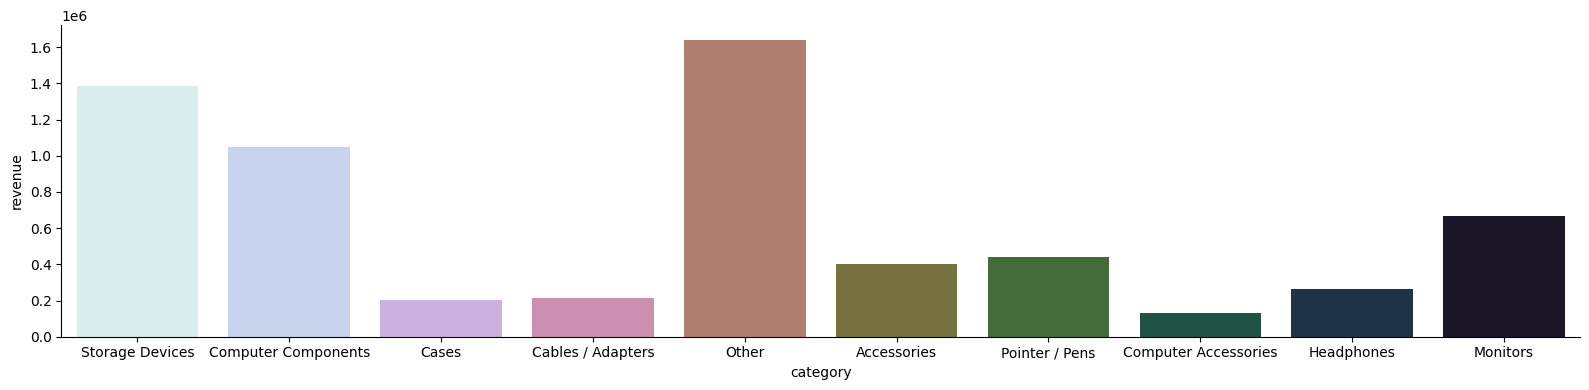

In [76]:
sns.catplot(kind="bar",
            data = top10_cat_qty,
            x="category",
            y = "qty",
            height = 4,
            aspect=4,
            palette="cubehelix_r"),
sns.catplot(kind="bar",
            data = top10_cat_qty,
            x="category",
            y = "revenue",
            height = 4,
            aspect=4,
            palette="cubehelix_r");

In [77]:
top10_cat_rev = (discounts_df.groupby('category', as_index = False)
            .agg({'percentage' : 'mean', 'revenue' : 'sum', 'price' : 'mean', 'unit_price' : 'mean' , 'discount' : 'mean', 'qty' : 'sum'})
            .round(2).sort_values('revenue', ascending = False)).head(10)
top10_cat_rev

,category,percentage,revenue,price,unit_price,discount,qty
14,Other,15.09,1640048.30,374.01,330.70,43.30,5012
22,Storage Devices,17.68,1385286.15,221.31,190.87,30.44,7586
6,Computer Components,15.77,1048887.33,189.78,151.36,38.42,7313
11,Monitors,11.99,665939.42,442.84,388.11,54.73,1749
16,Pointer / Pens,17.83,439345.10,143.14,113.47,29.67,3627
0,Accessories,25.36,400397.61,144.24,92.31,51.93,4648
24,Tablets,8.12,400278.41,633.79,579.33,54.46,697
8,Headphones,28.84,265033.43,137.02,106.90,30.13,2601
7,Drawing Tablets,21.63,251890.29,248.49,196.67,51.82,1331
10,Laptops / Desktops,23.24,236422.42,1035.79,761.25,274.54,311


In [78]:
discounts_df.head(1)

,id_order,date,qty,unit_price,sku,brand,revenue,name,category,price,promo_price,keyword,discount,percentage
0,299545,2017-01-01 01:46:16,1,47.49,OWC0100,OWC,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Cables / Adapters,60.99,50.0,mac,13.5,22.13


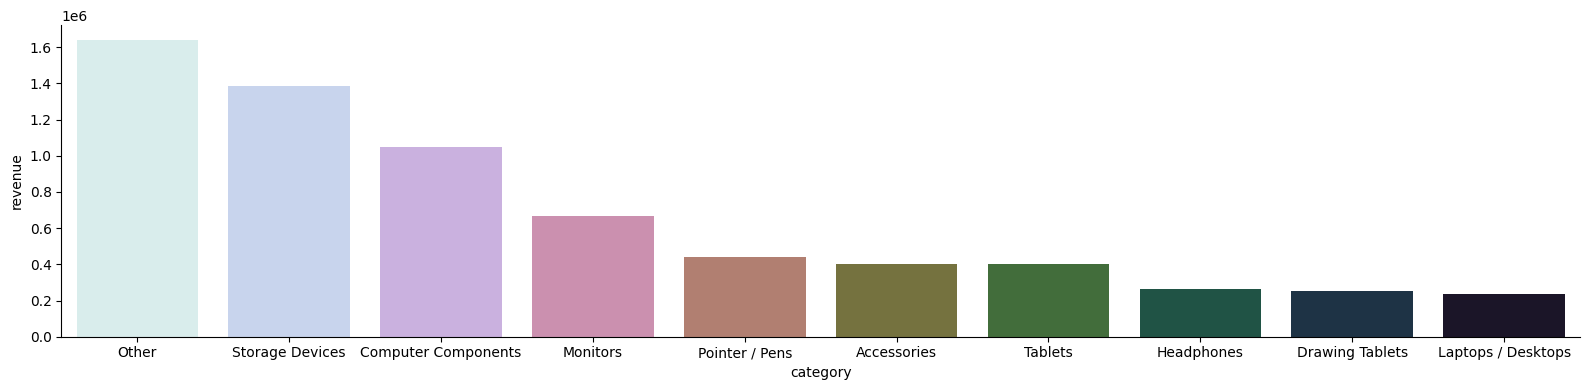

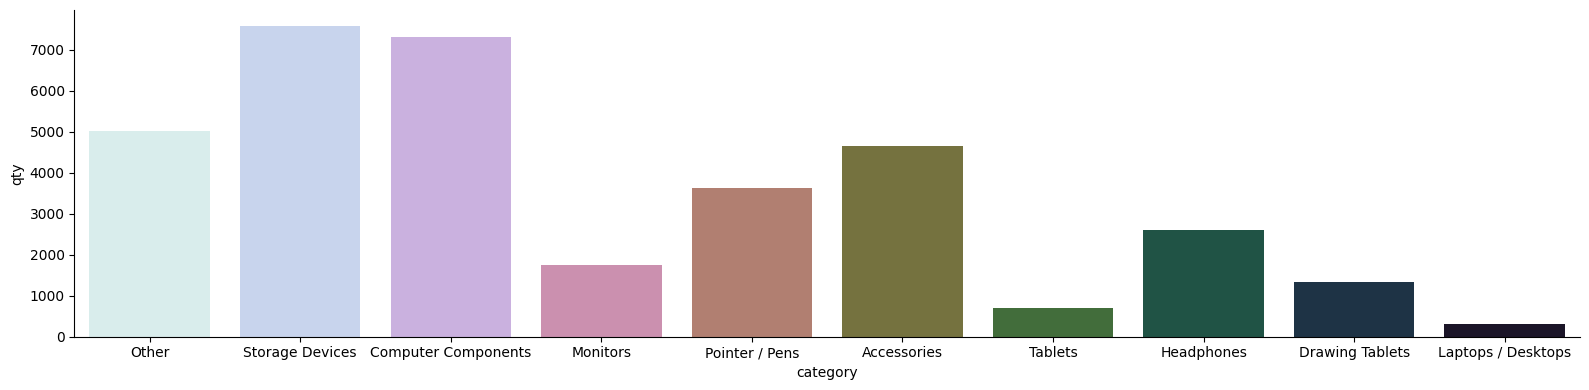

In [79]:
catplot = sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "revenue",
            height = 4,
            aspect= 4,
            palette="cubehelix_r");
catplot2 = sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "qty",
            height = 4,
            aspect=4,
            palette="cubehelix_r");

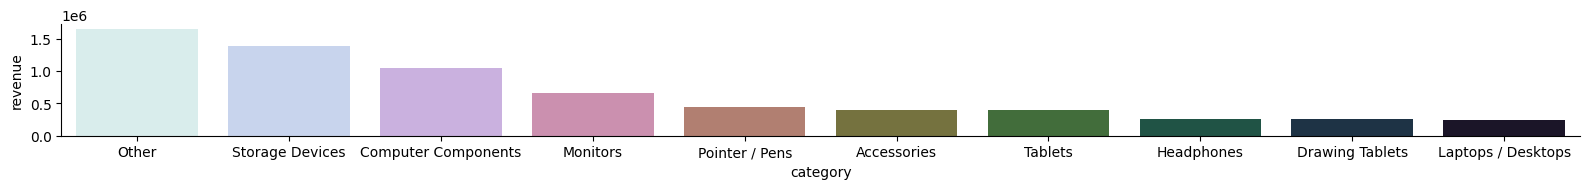

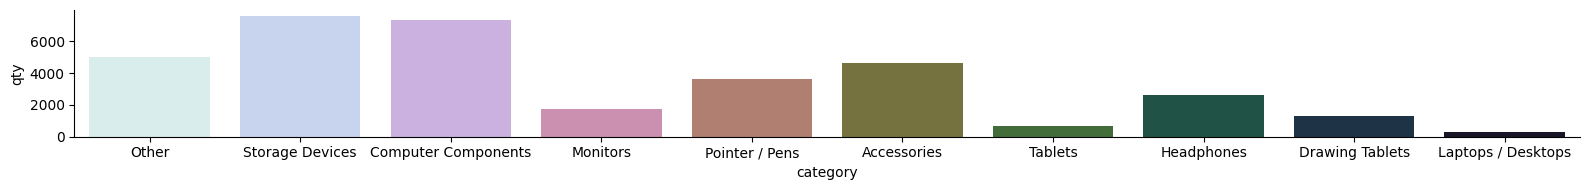

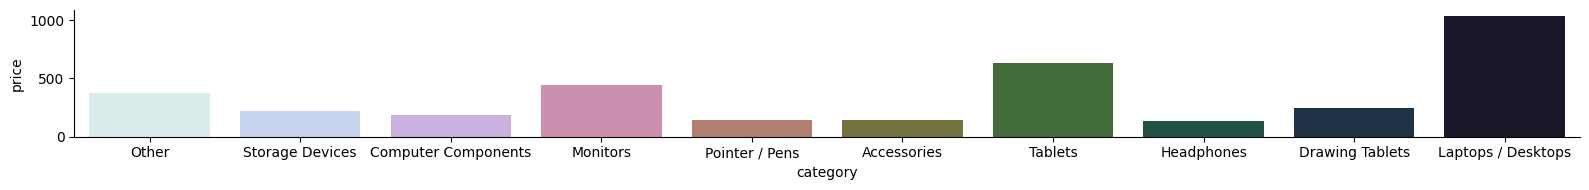

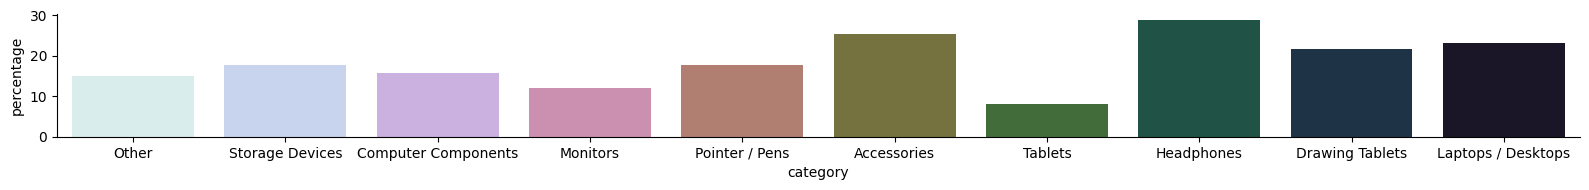

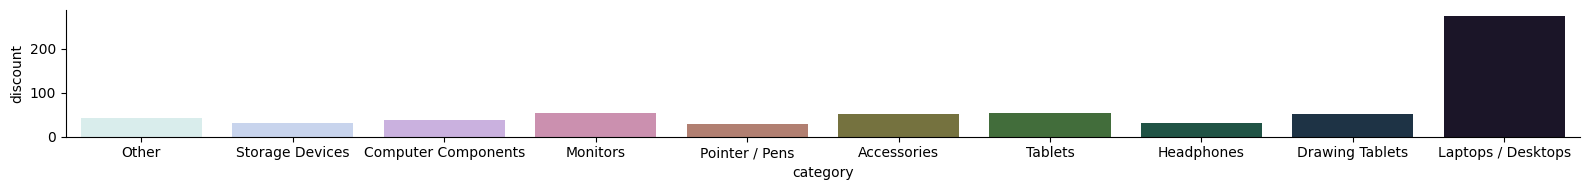

In [80]:
sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "revenue",
            height = 2,
            aspect= 8,
            palette="cubehelix_r");
sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "qty",
            height = 2,
            aspect=8,
            palette="cubehelix_r");
sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "price",
            height = 2,
            aspect= 8,
            palette="cubehelix_r");
sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "percentage",
            height = 2,
            aspect=8,
            palette="cubehelix_r");
sns.catplot(kind="bar",
            data = top10_cat_rev,
            x="category",
            y = "discount",
            height = 2,
            aspect=8,
            palette="cubehelix_r");

In [81]:
price_t10 = top10_cat_rev.sort_values(by = 'price', ascending = False)

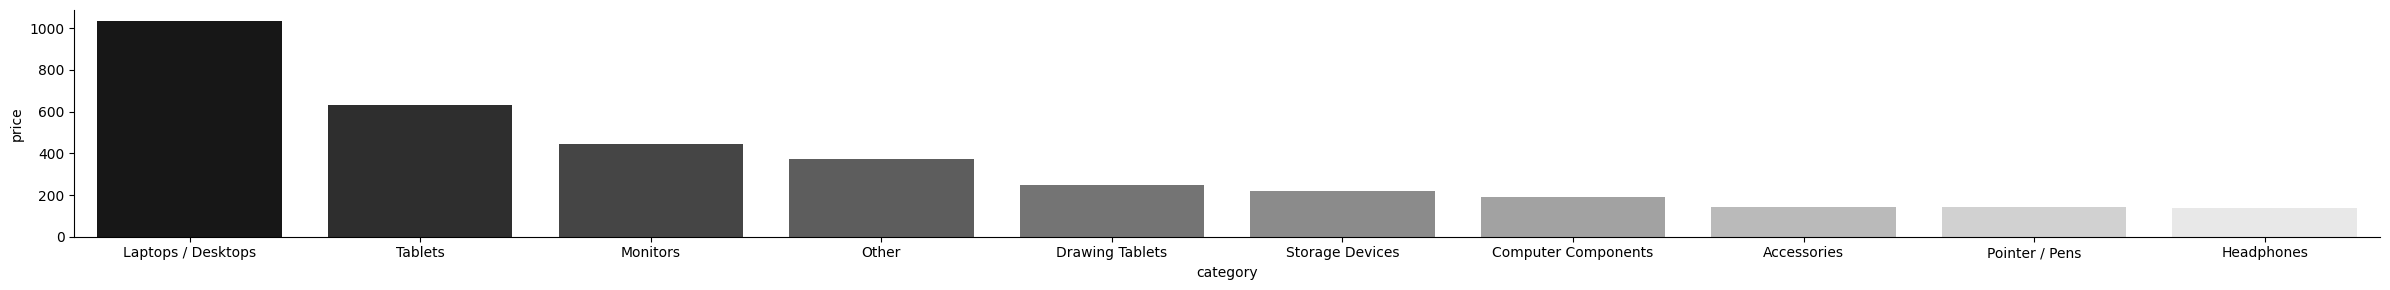

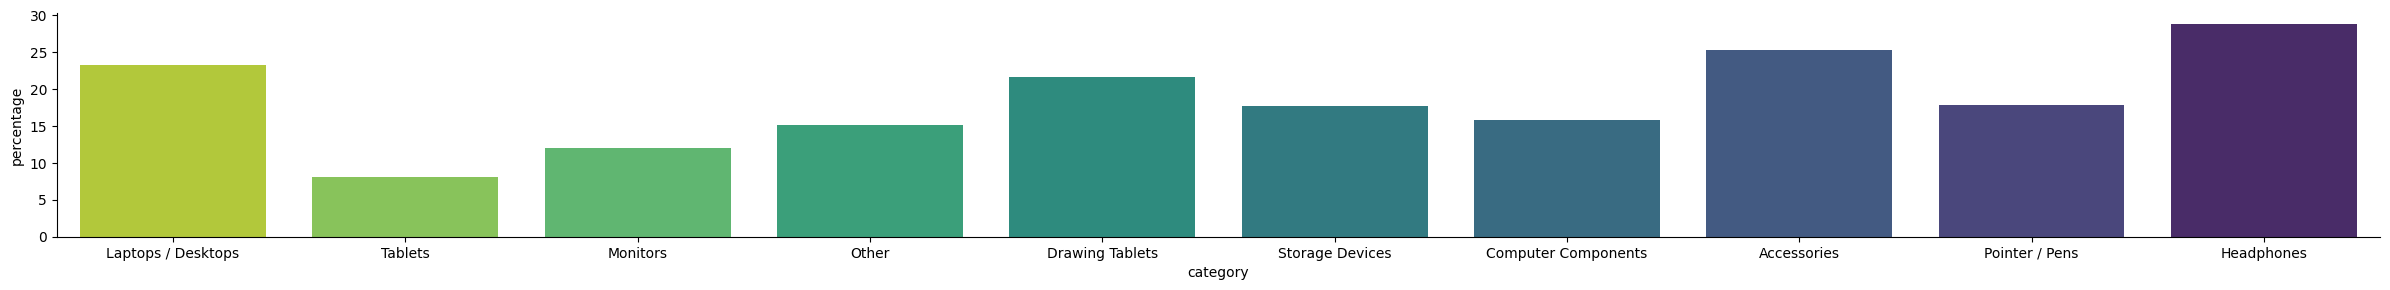

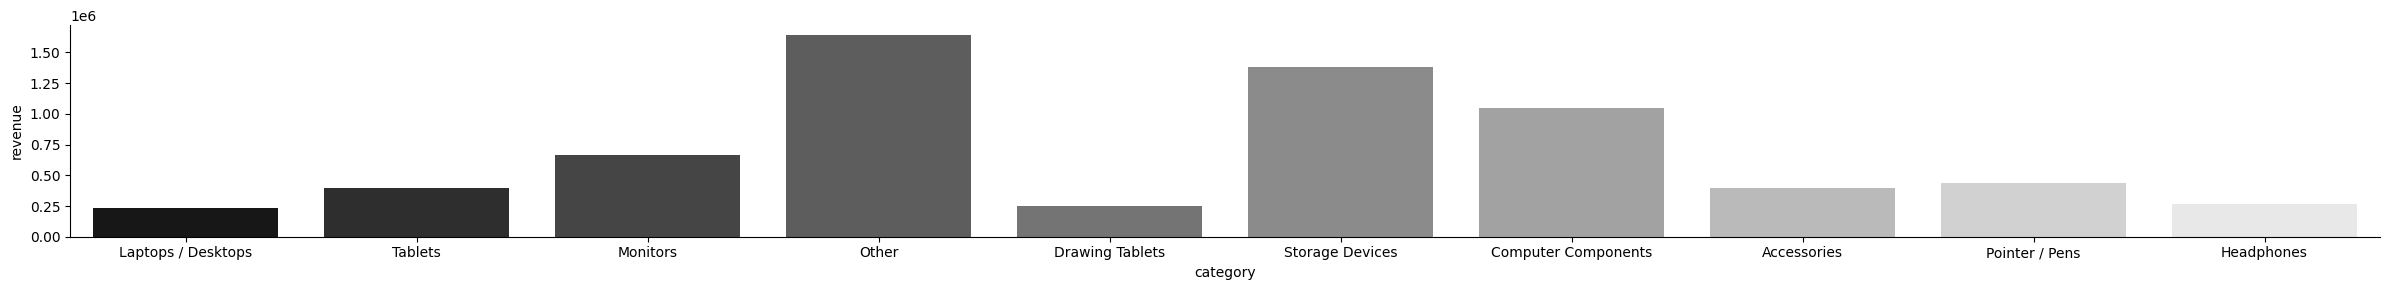

In [82]:
sns.catplot(kind="bar",
            data = price_t10,
            x="category",
            y = "price",
            height = 3,
            aspect= 8,
            palette="gray");
sns.catplot(kind="bar",
            data = price_t10,
            x="category",
            y = "percentage",
            height = 3,
            aspect=8,
            palette="viridis_r");
sns.catplot(kind="bar",
            data = price_t10,
            x="category",
            y = "revenue",
            height = 3,
            aspect=8,
            palette="gray");

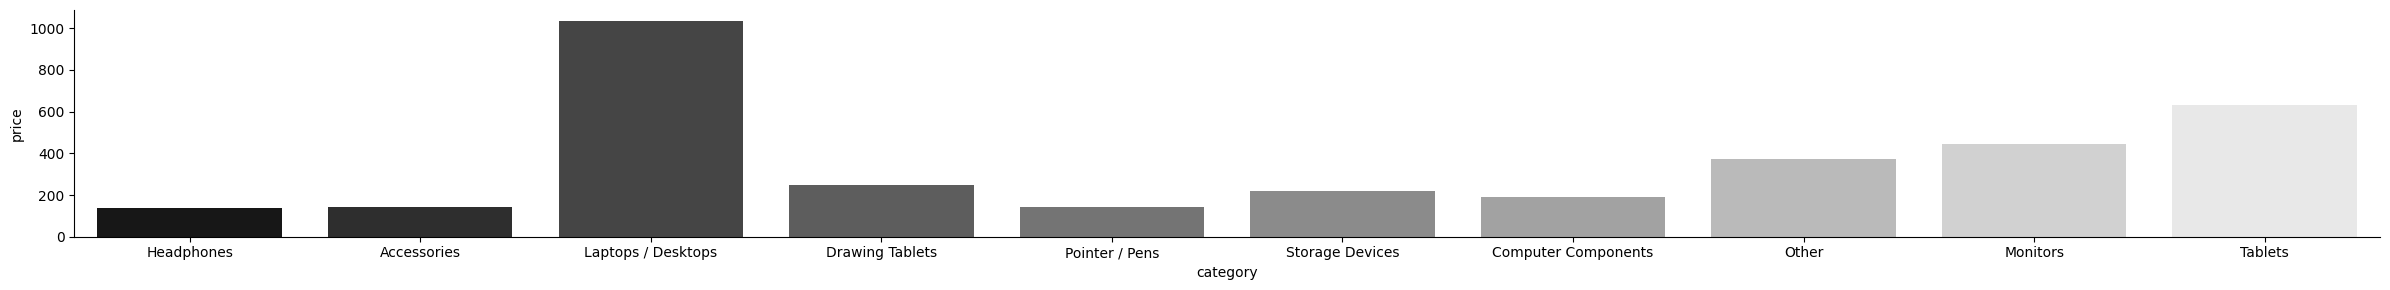

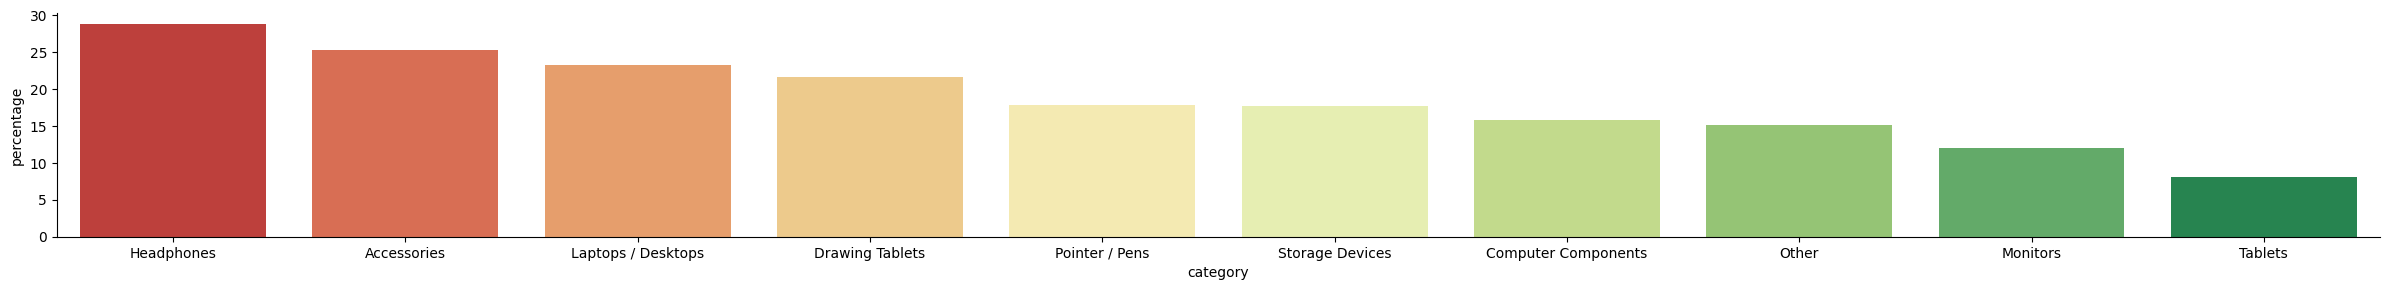

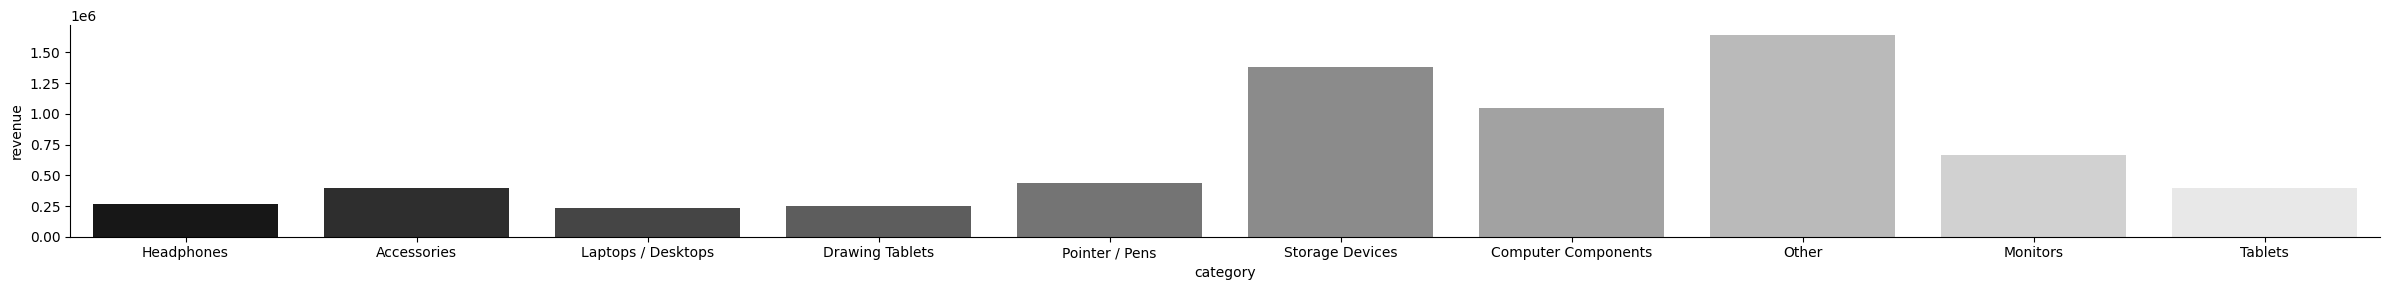

In [83]:
disc_t10 = top10_cat_rev.sort_values(by = 'percentage', ascending = False)
sns.catplot(kind="bar",
            data = disc_t10,
            x="category",
            y = "price",
            height = 3,
            aspect=8,
            palette="gray");
sns.catplot(kind="bar",
            data = disc_t10,
            x="category",
            y = "percentage",
            height = 3,
            aspect= 8,
            palette="RdYlGn");
sns.catplot(kind="bar",
            data = disc_t10,
            x="category",
            y = "revenue",
            height = 3,
            aspect=8,
            palette="gray");

In [84]:
top10_cat_price = (discounts_df.groupby('category', as_index = False)
            .agg({'price' : 'mean', 'unit_price' : 'mean' , 'discount' : 'mean', 'percentage' : 'mean', 'revenue' : 'sum',  'qty' : 'sum'})
            .round(2).sort_values('price', ascending = False)).head(10)
top10_cat_price

,category,price,unit_price,discount,percentage,revenue,qty
10,Laptops / Desktops,1035.79,761.25,274.54,23.24,236422.42,311
24,Tablets,633.79,579.33,54.46,8.12,400278.41,697
11,Monitors,442.84,388.11,54.73,11.99,665939.42,1749
14,Other,374.01,330.70,43.30,15.09,1640048.30,5012
20,Smartwatches,275.69,246.93,28.76,10.76,60168.03,248
7,Drawing Tablets,248.49,196.67,51.82,21.63,251890.29,1331
22,Storage Devices,221.31,190.87,30.44,17.68,1385286.15,7586
21,Speakers,211.44,166.39,45.05,21.53,145668.17,892
27,iPod / MP3Players,189.95,167.94,22.01,13.70,16393.54,97
6,Computer Components,189.78,151.36,38.42,15.77,1048887.33,7313


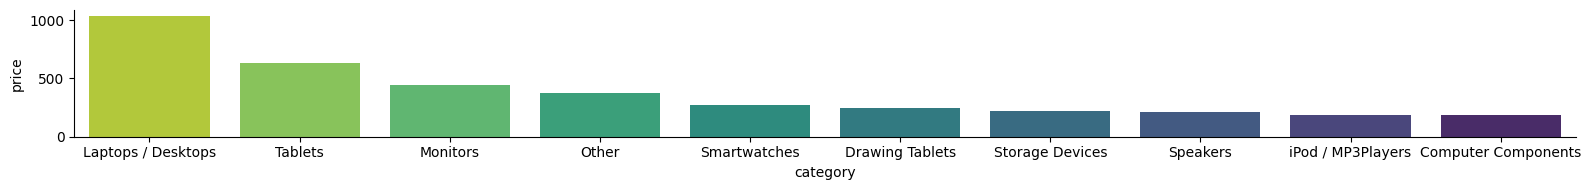

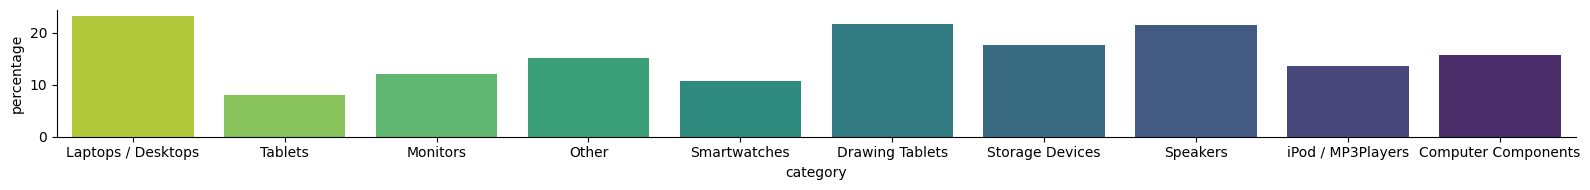

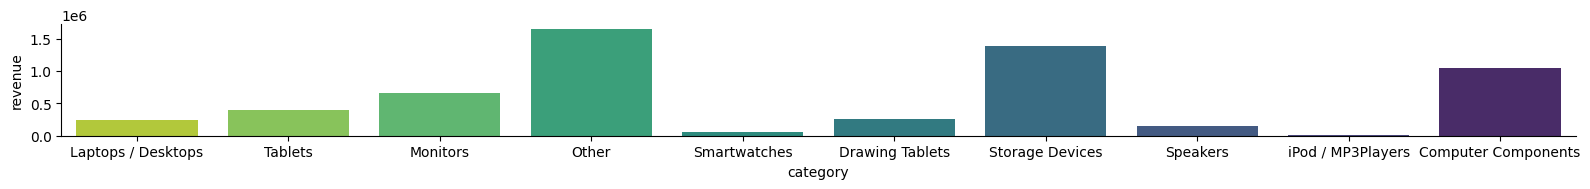

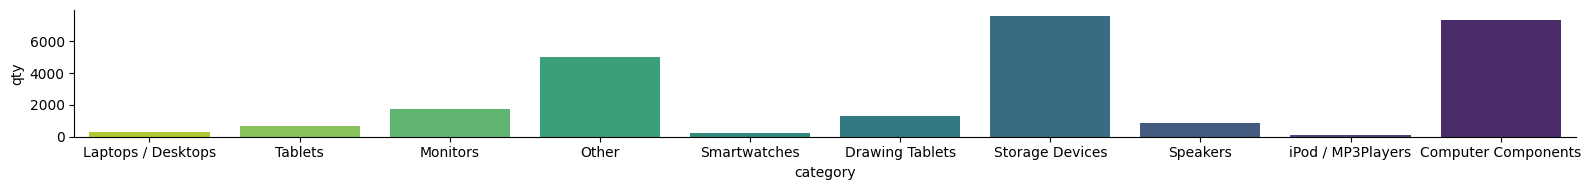

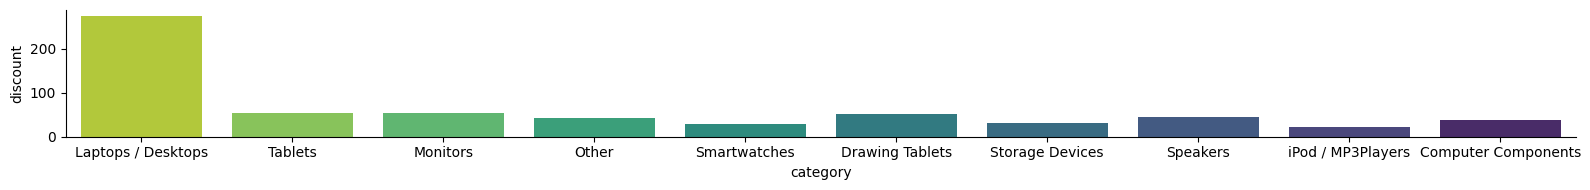

In [85]:
sns.catplot(kind="bar",
            data = top10_cat_price,
            x="category",
            y = "price",
            height = 2,
            aspect= 8,
            palette="viridis_r");
sns.catplot(kind="bar",
            data = top10_cat_price,
            x="category",
            y = "percentage",
            height = 2,
            aspect=8,
            palette="viridis_r");
sns.catplot(kind="bar",
            data = top10_cat_price,
            x="category",
            y = "revenue",
            height = 2,
            aspect= 8,
            palette="viridis_r");
sns.catplot(kind="bar",
            data = top10_cat_price,
            x="category",
            y = "qty",
            height = 2,
            aspect=8,
            palette="viridis_r");
sns.catplot(kind="bar",
            data = top10_cat_price,
            x="category",
            y = "discount",
            height = 2,
            aspect=8,
            palette="viridis_r");

In [86]:
top10_cat_disc = (discounts_df.groupby('category', as_index = False)
            .agg({'price' : 'mean', 'unit_price' : 'mean' , 'discount' : 'mean', 'percentage' : 'mean', 'revenue' : 'sum',  'qty' : 'sum'})
            .round(2).sort_values('percentage', ascending = False)).head(10)
top10_cat_disc

,category,price,unit_price,discount,percentage,revenue,qty
19,Smartwatch Accessories,15.27,9.37,5.89,39.39,2293.11,250
1,Battery,96.05,68.58,27.47,31.35,104769.81,1554
3,Cases,44.57,30.66,13.91,31.31,204396.03,6684
9,Keyboard,96.19,66.58,29.61,30.98,114951.86,1716
23,Tablet Accessories,33.33,22.93,10.40,28.86,2114.10,93
8,Headphones,137.02,106.90,30.13,28.84,265033.43,2601
2,Cables / Adapters,46.19,34.58,11.61,28.54,216762.09,6655
0,Accessories,144.24,92.31,51.93,25.36,400397.61,4648
10,Laptops / Desktops,1035.79,761.25,274.54,23.24,236422.42,311
13,Network,100.10,78.30,21.81,23.06,42797.60,561


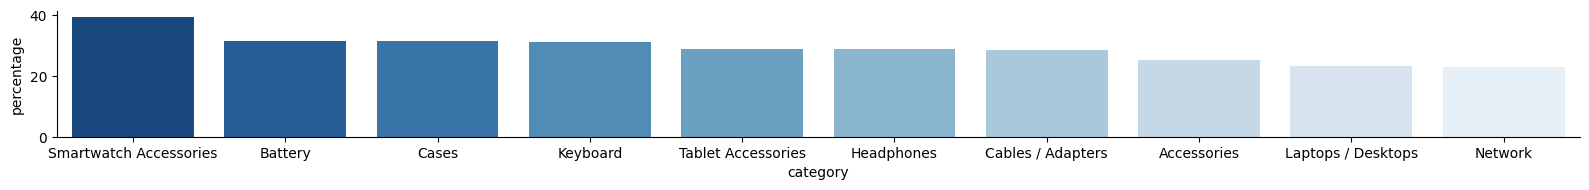

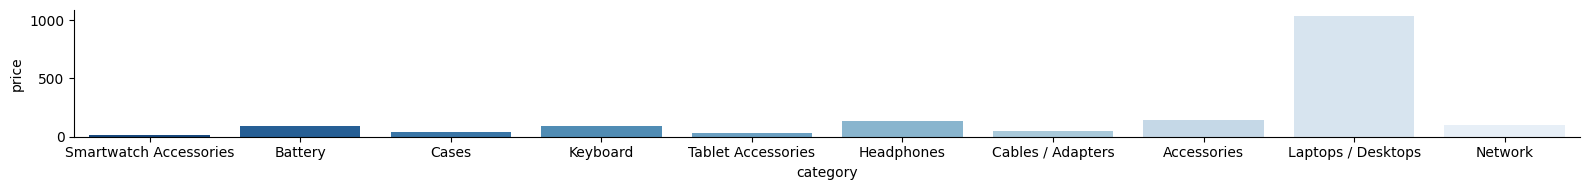

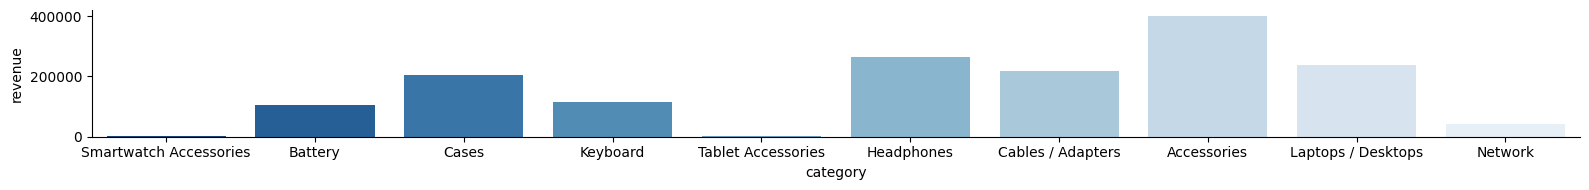

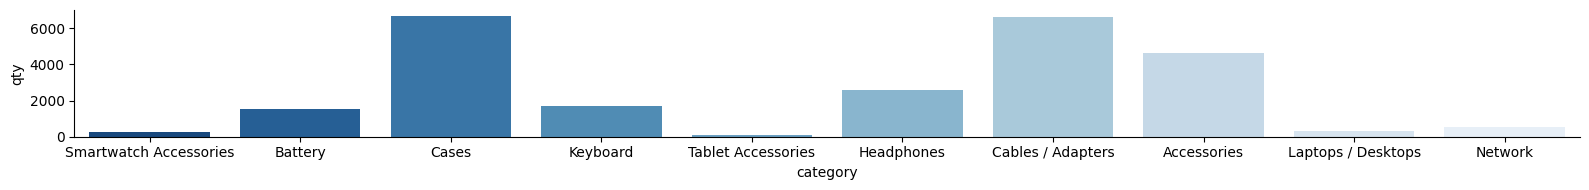

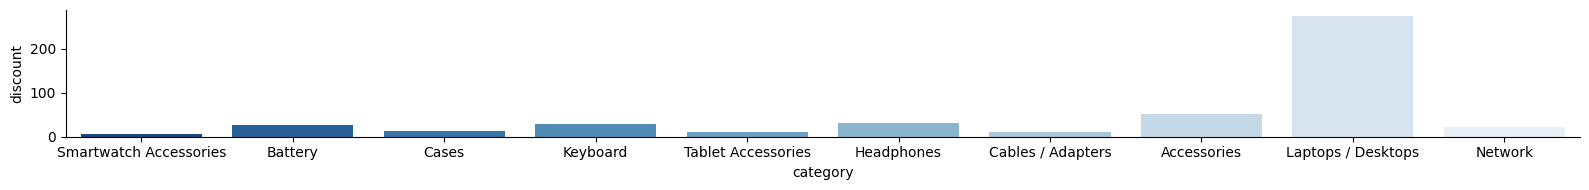

In [87]:
sns.catplot(kind="bar",
            data = top10_cat_disc,
            x="category",
            y = "percentage",
            height = 2,
            aspect=8,
            palette="Blues_r");
sns.catplot(kind="bar",
            data = top10_cat_disc,
            x="category",
            y = "price",
            height = 2,
            aspect= 8,
            palette="Blues_r");
sns.catplot(kind="bar",
            data = top10_cat_disc,
            x="category",
            y = "revenue",
            height = 2,
            aspect= 8,
            palette="Blues_r");
sns.catplot(kind="bar",
            data = top10_cat_disc,
            x="category",
            y = "qty",
            height = 2,
            aspect=8,
            palette="Blues_r");
sns.catplot(kind="bar",
            data = top10_cat_disc,
            x="category",
            y = "discount",
            height = 2,
            aspect=8,
            palette="Blues_r");

In [91]:
corr_rev_disc_t10d = top10_cat_disc['percentage'].corr(top10_cat_disc['revenue'])
corr_rev_disc_t10d

-0.43435040716181117

In [92]:
corr_rev_disc_t10q = top10_cat_qty['percentage'].corr(top10_cat_qty['revenue'])
corr_rev_disc_t10q

-0.6922801047662208

In [93]:
corr_rev_disc_t10p = top10_cat_price['percentage'].corr(top10_cat_price['revenue'])
corr_rev_disc_t10p

-0.051637688547238735

In [94]:
corr_rev_disc_t10r = top10_cat_rev['percentage'].corr(top10_cat_rev['revenue'])
corr_rev_disc_t10r

-0.39452967174255676

In [95]:
corr_rev_disc = discounts_df['percentage'].corr(discounts_df['revenue'])
corr_rev_disc

-0.29463834560480817

In [96]:
top10_cat_rev.price.mean()

357.041

In [97]:
top10_cat_rev.unit_price.mean()

291.097

In [98]:
top10_cat_rev.unit_price.mean()

291.097

In [99]:
discounts_df.head(1)

,id_order,date,qty,unit_price,sku,brand,revenue,name,category,price,promo_price,keyword,discount,percentage
0,299545,2017-01-01 01:46:16,1,47.49,OWC0100,OWC,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Cables / Adapters,60.99,50.0,mac,13.5,22.13


### Seasonality

In [100]:
(
    discounts_df
    .resample("D", on="date")
    .sum()["revenue"]
 );

### Price distribution per category

In [103]:
# #sns.displot(
#             data = discounts_df,
#             x = 'price',
#             col = 'category',
#             col_wrap = 4,
#             height = 2,
#             aspect = 4
#           );

### Revenue

In [104]:
discounts_df.head(1)

,id_order,date,qty,unit_price,sku,brand,revenue,name,category,price,promo_price,keyword,discount,percentage
0,299545,2017-01-01 01:46:16,1,47.49,OWC0100,OWC,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Cables / Adapters,60.99,50.0,mac,13.5,22.13


In [105]:
print(f"The overall revenue from 01/01/2017 to 14/03/2018 is: {ol_df.unit_price_total.sum().round(2)} Euros")

The overall revenue from 01/01/2017 to 14/03/2018 is: 8034161.93 Euros


In [106]:
rev_day = discounts_df.resample('D', on = 'date').sum()[['revenue']]
rev_day.reset_index()

,date,revenue
0,2017-01-01,16378.14
1,2017-01-02,39354.49
2,2017-01-03,36243.70
3,2017-01-04,16562.98
4,2017-01-05,11643.24
...,...,...
433,2018-03-10,8401.73
434,2018-03-11,9395.77
435,2018-03-12,24800.47
436,2018-03-13,12220.97


In [107]:
rev_m = discounts_df.resample('M', on = 'date').sum()[['revenue']]
rev_m.reset_index()

,date,revenue
0,2017-01-31,622223.71
1,2017-02-28,331988.07
2,2017-03-31,25528.96
3,2017-04-30,235871.14
4,2017-05-31,341544.39
5,2017-06-30,293635.48
6,2017-07-31,618598.14
7,2017-08-31,386291.88
8,2017-09-30,403476.64
9,2017-10-31,566954.85


In [108]:
rev_q = discounts_df.resample('Q', on = 'date').sum()[['revenue']]
rev_q.reset_index()

,date,revenue
0,2017-03-31,979740.74
1,2017-06-30,871051.01
2,2017-09-30,1408366.66
3,2017-12-31,3124016.80
4,2018-03-31,1650986.72


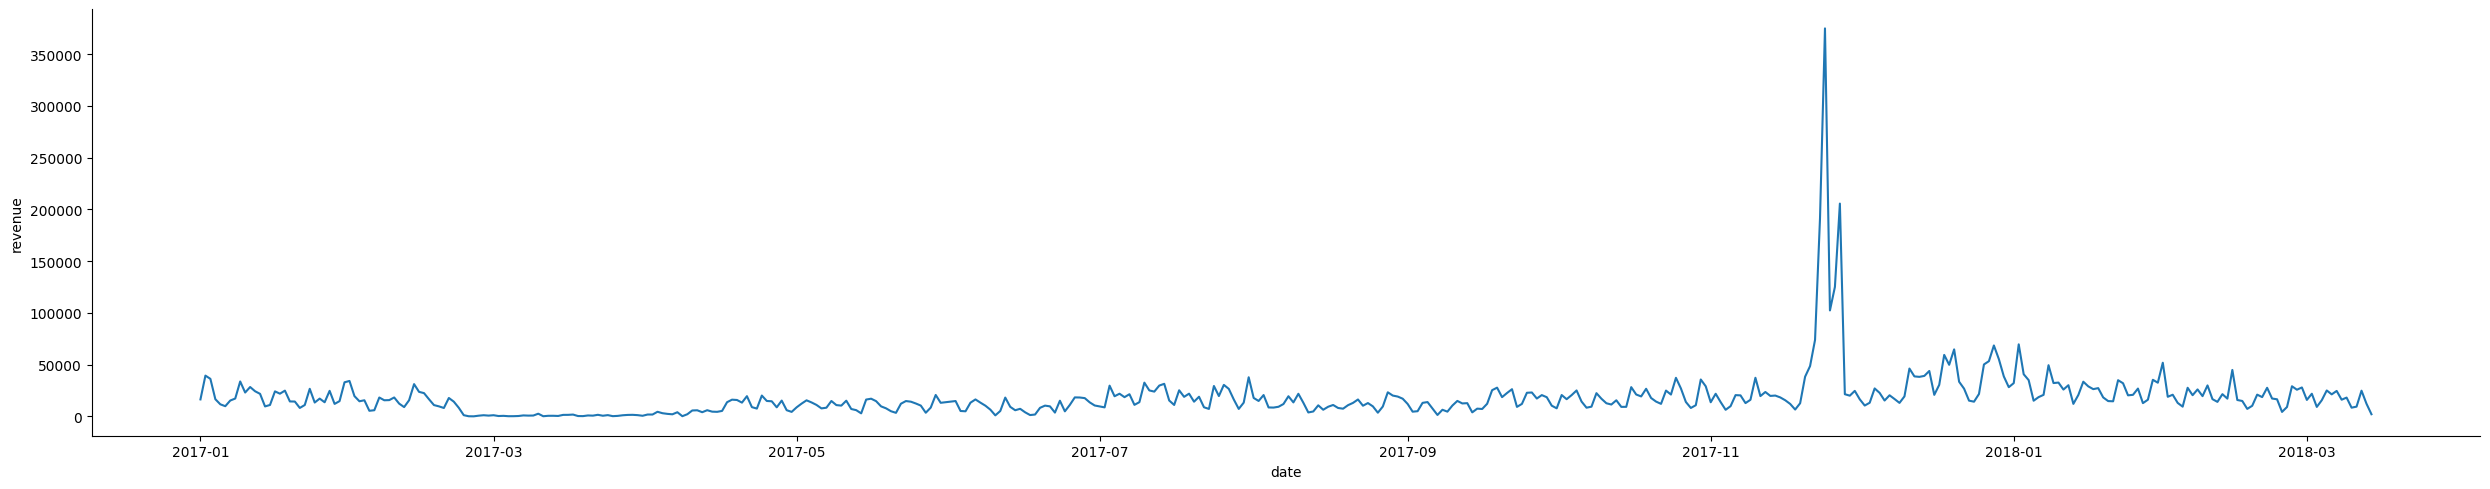

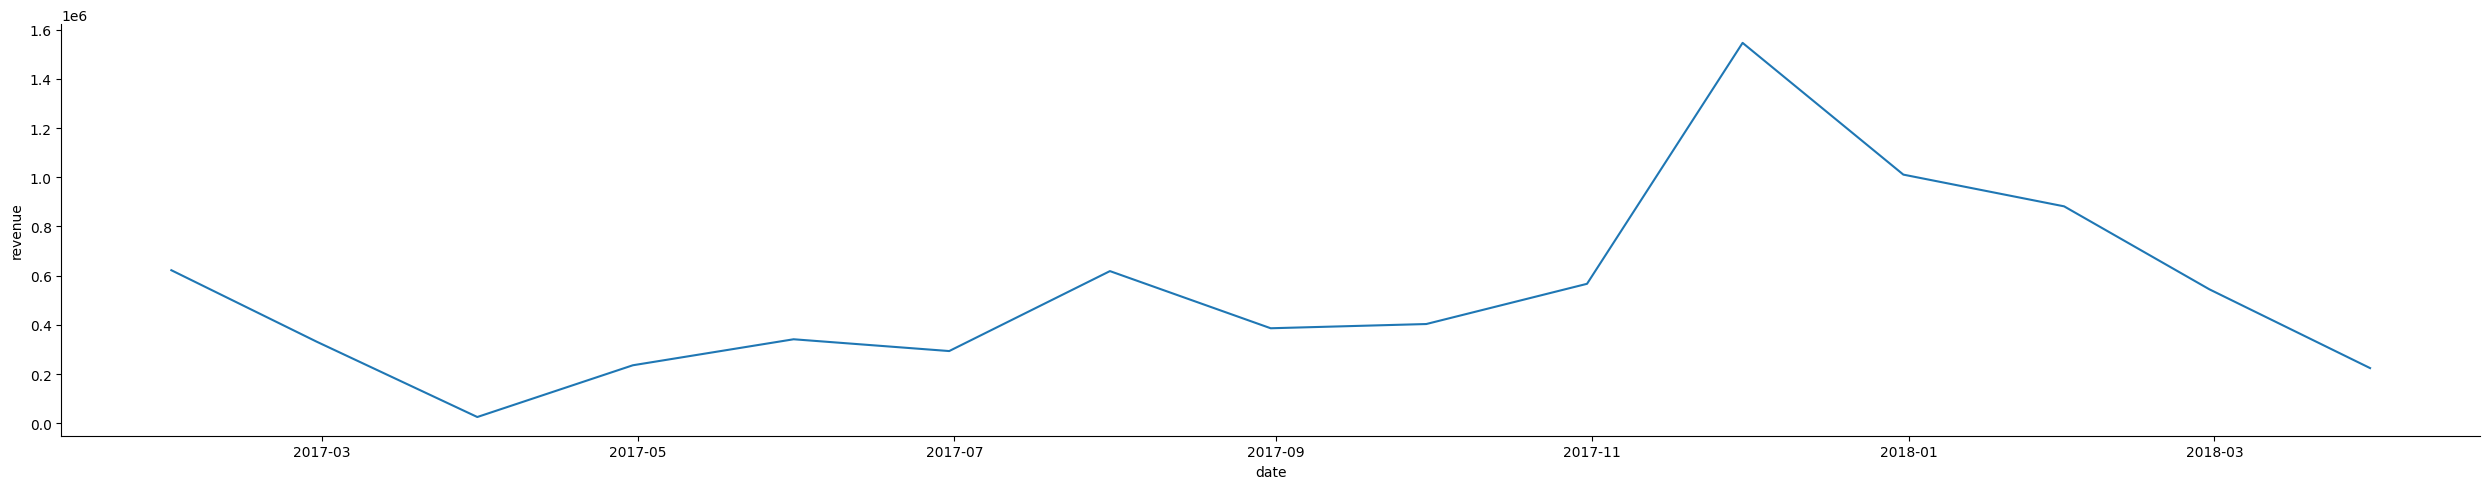

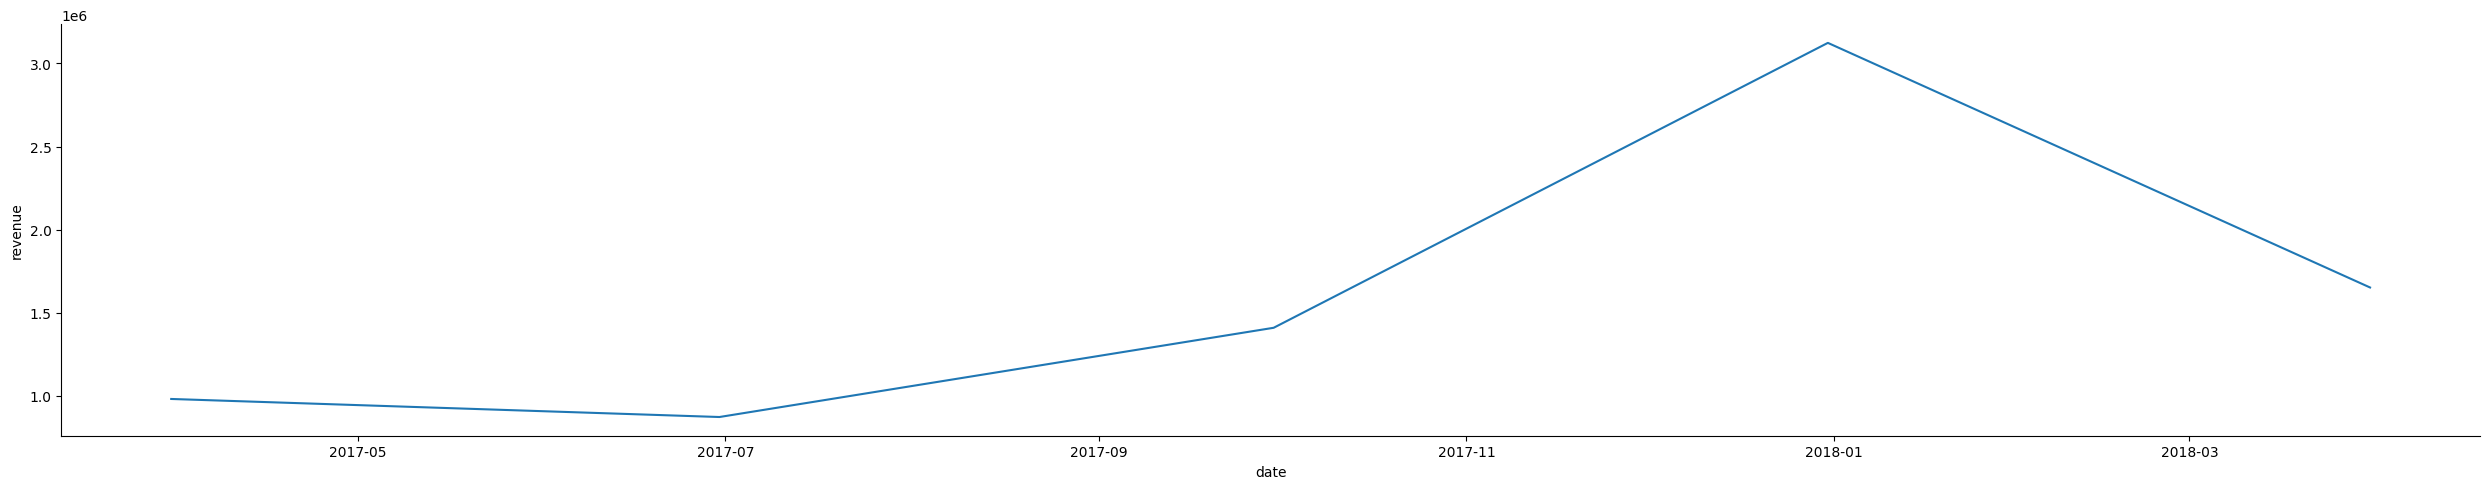

In [109]:
sns.relplot(kind = 'line',
            data = rev_day,
            x = 'date',
            y = 'revenue',
            aspect = 5
            ),
sns.relplot(kind = 'line',
            data = rev_m,
            x = 'date',
            y = 'revenue',
            aspect = 5
            ),
sns.relplot(kind = 'line',
            data = rev_q,
            x = 'date',
            y = 'revenue',
            aspect = 5
            );

In [110]:
qty_day = discounts_df.resample('D', on = 'date').sum()[['qty']]
qty_day.reset_index()

,date,qty
0,2017-01-01,145
1,2017-01-02,452
2,2017-01-03,340
3,2017-01-04,156
4,2017-01-05,170
...,...,...
433,2018-03-10,84
434,2018-03-11,80
435,2018-03-12,172
436,2018-03-13,103


In [111]:
qty_m = discounts_df.resample('M', on = 'date').sum()[['qty']]
qty_m.reset_index()

,date,qty
0,2017-01-31,7056
1,2017-02-28,2996
2,2017-03-31,247
3,2017-04-30,2216
4,2017-05-31,2668
5,2017-06-30,2158
6,2017-07-31,4809
7,2017-08-31,3132
8,2017-09-30,2872
9,2017-10-31,4166


In [112]:
qty_q = discounts_df.resample('Q', on = 'date').sum()[['qty']]
qty_q.reset_index()

,date,qty
0,2017-03-31,10299
1,2017-06-30,7042
2,2017-09-30,10813
3,2017-12-31,20984
4,2018-03-31,13154


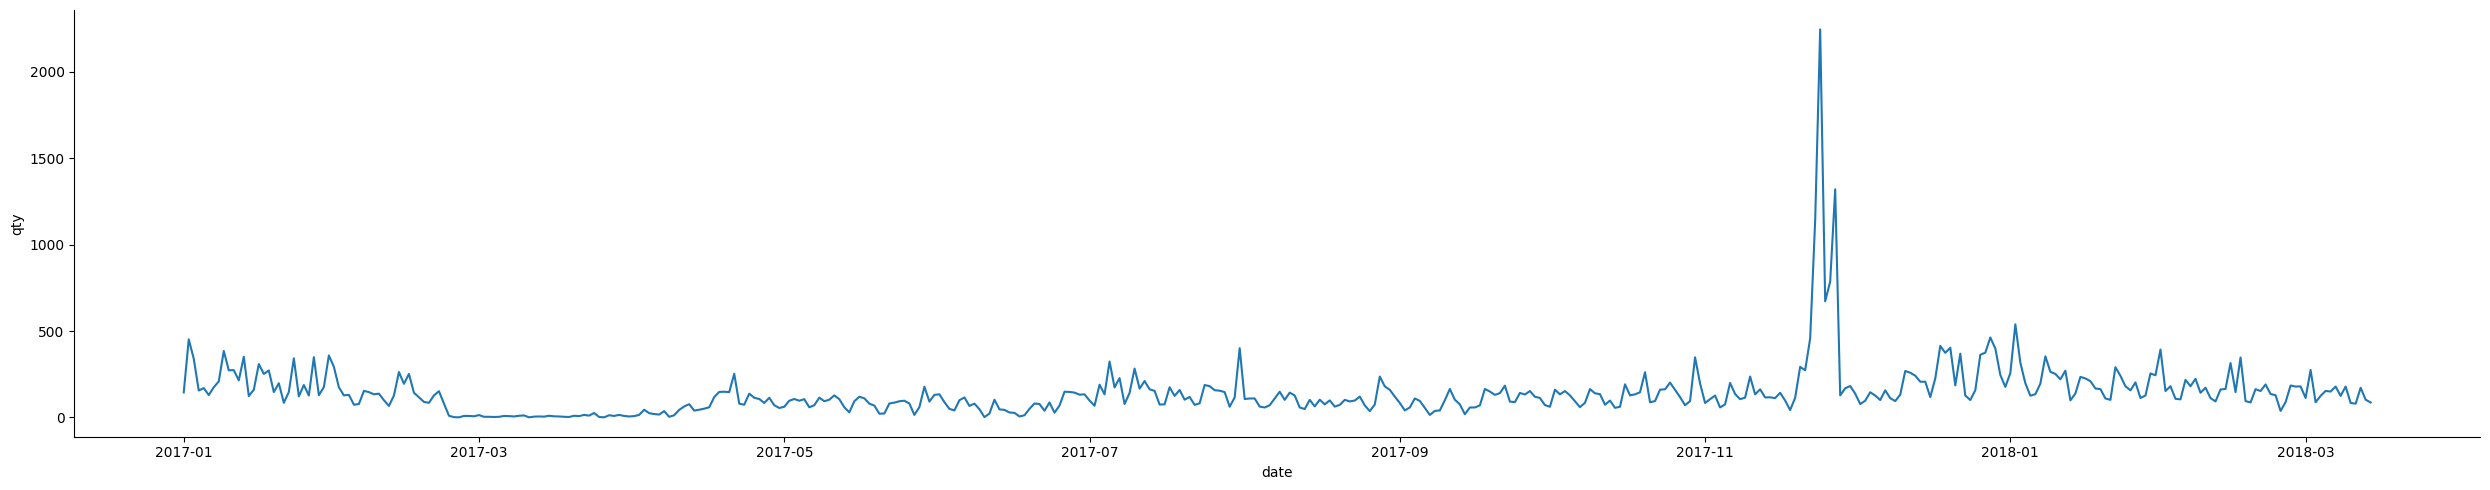

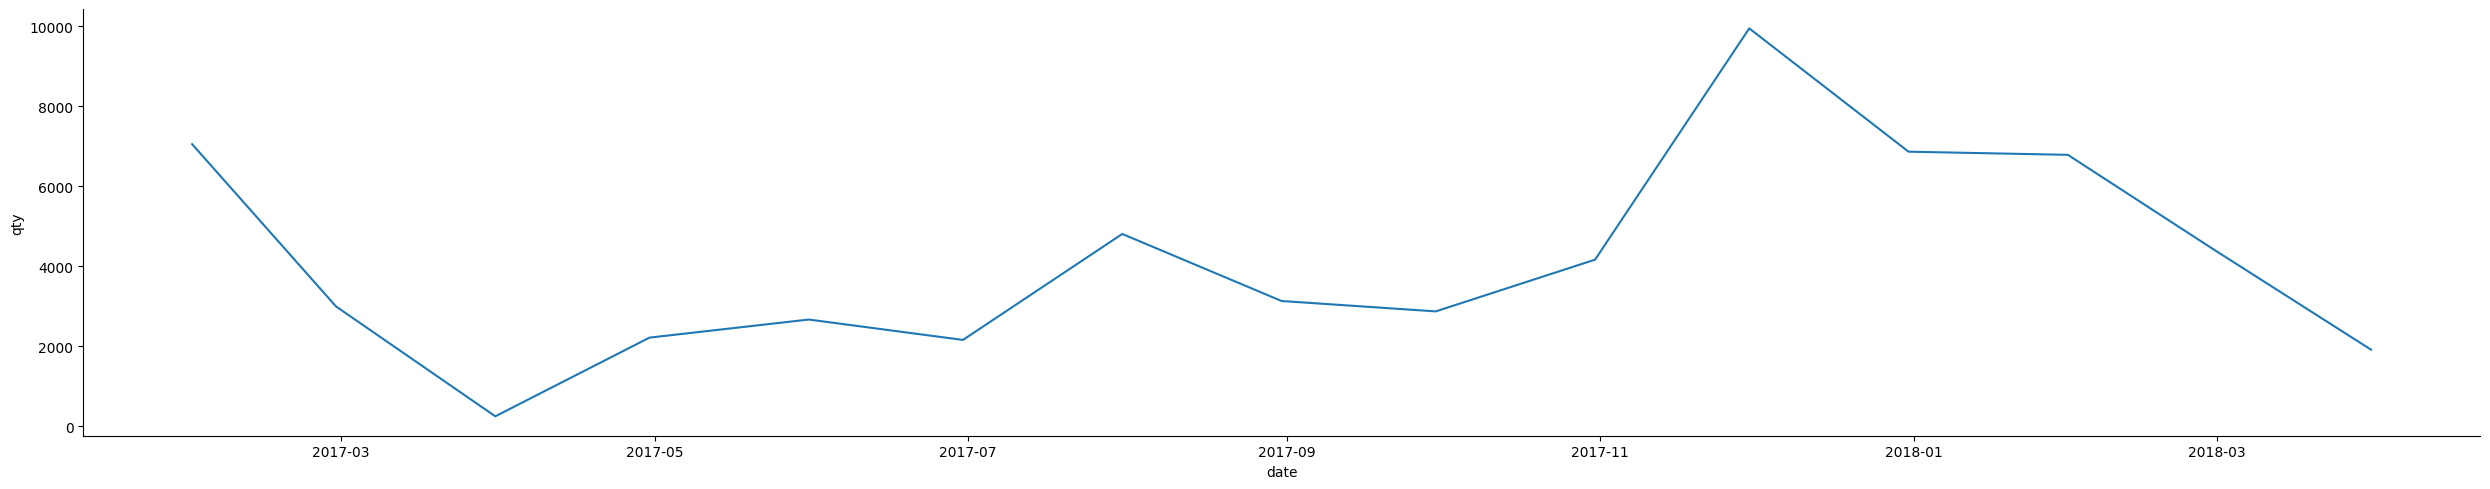

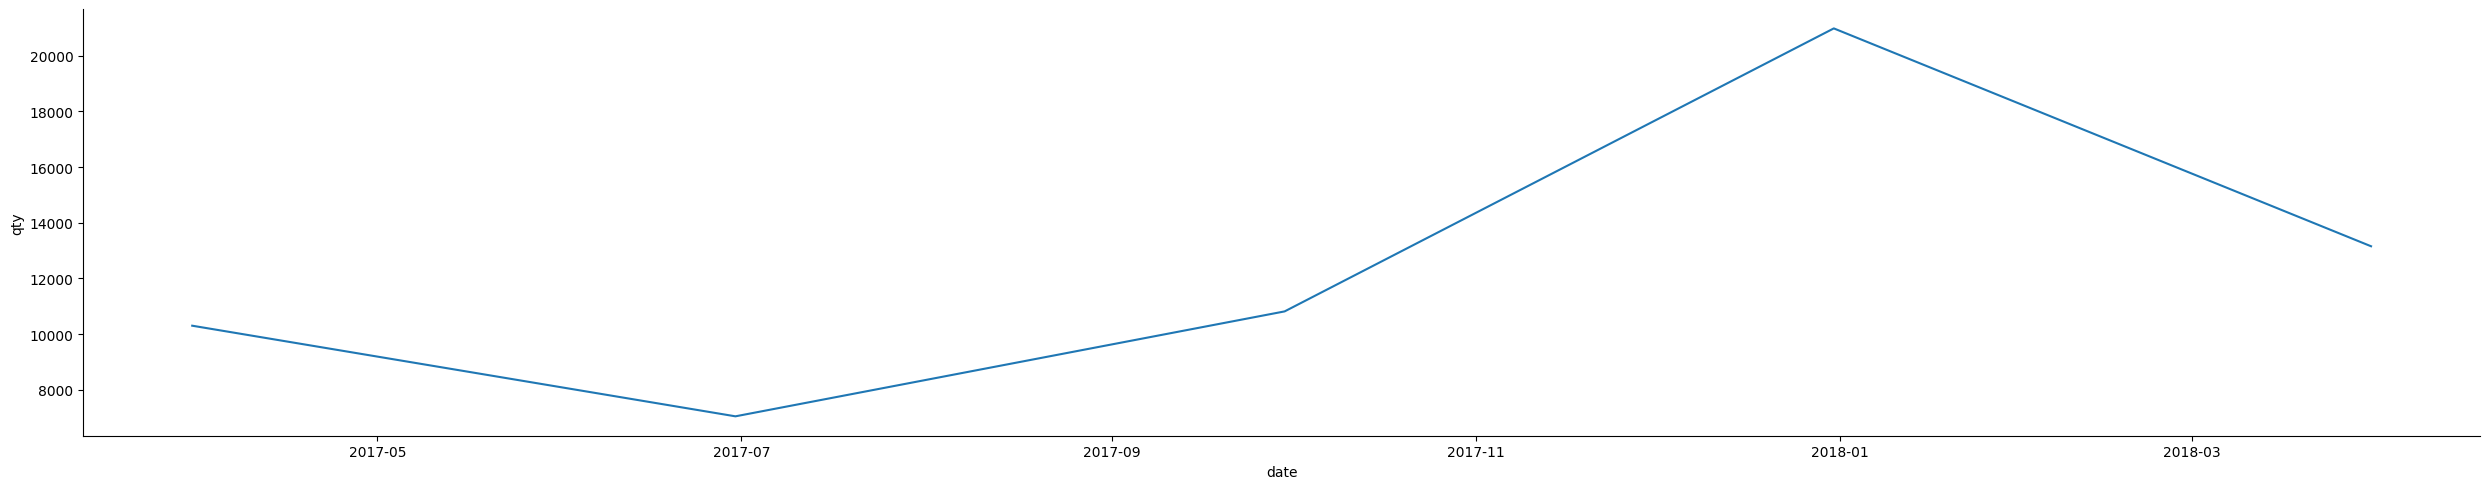

In [113]:
sns.relplot(kind = 'line',
            data = qty_day,
            x = 'date',
            y = 'qty',
            aspect = 5
            ),
sns.relplot(kind = 'line',
            data = qty_m,
            x = 'date',
            y = 'qty',
            aspect = 5
            ),
sns.relplot(kind = 'line',
            data = qty_q,
            x = 'date',
            y = 'qty',
            aspect = 5
            );

### Over time

In [114]:
disc_per_day = discounts_df.resample('D', on = 'date').mean()[['discount', 'percentage']]
disc_per_day.reset_index()

,date,discount,percentage
0,2017-01-01,23.681221,20.509924
1,2017-01-02,22.240848,17.875141
2,2017-01-03,23.312260,19.450898
3,2017-01-04,15.945429,18.893429
4,2017-01-05,57.584342,38.418289
...,...,...,...
433,2018-03-10,27.067308,22.582821
434,2018-03-11,30.875135,21.836216
435,2018-03-12,41.621053,19.648092
436,2018-03-13,26.834516,17.513978


In [115]:
disc_per_m = discounts_df.resample('M', on = 'date').mean()[['discount', 'percentage']]
disc_per_m.reset_index()

,date,discount,percentage
0,2017-01-31,27.638258,25.302254
1,2017-02-28,22.385612,19.890650
2,2017-03-31,16.434932,19.277873
3,2017-04-30,21.993578,18.997309
4,2017-05-31,24.858028,16.342301
5,2017-06-30,27.406369,18.155657
6,2017-07-31,31.783184,25.303897
7,2017-08-31,32.106462,21.206733
8,2017-09-30,28.906737,20.711538
9,2017-10-31,31.845746,22.602874


In [116]:
disc_per_q = discounts_df.resample('Q', on = 'date').mean()[['discount', 'percentage']]
disc_per_q.reset_index()

,date,discount,percentage
0,2017-03-31,25.844190,23.588108
1,2017-06-30,24.697938,17.753183
2,2017-09-30,31.110503,22.893983
3,2017-12-31,33.262290,21.786409
4,2018-03-31,30.968201,22.787331


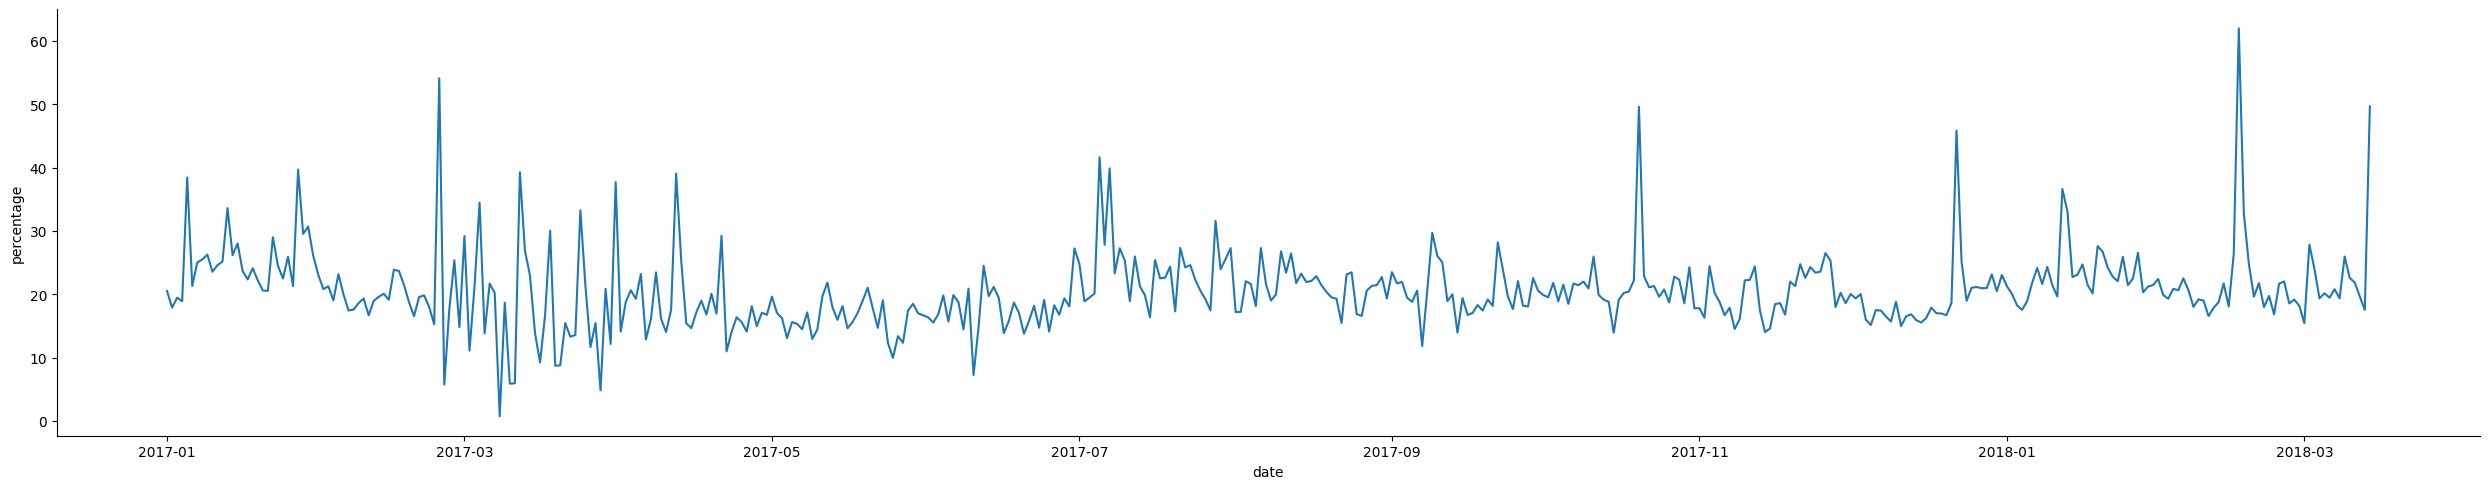

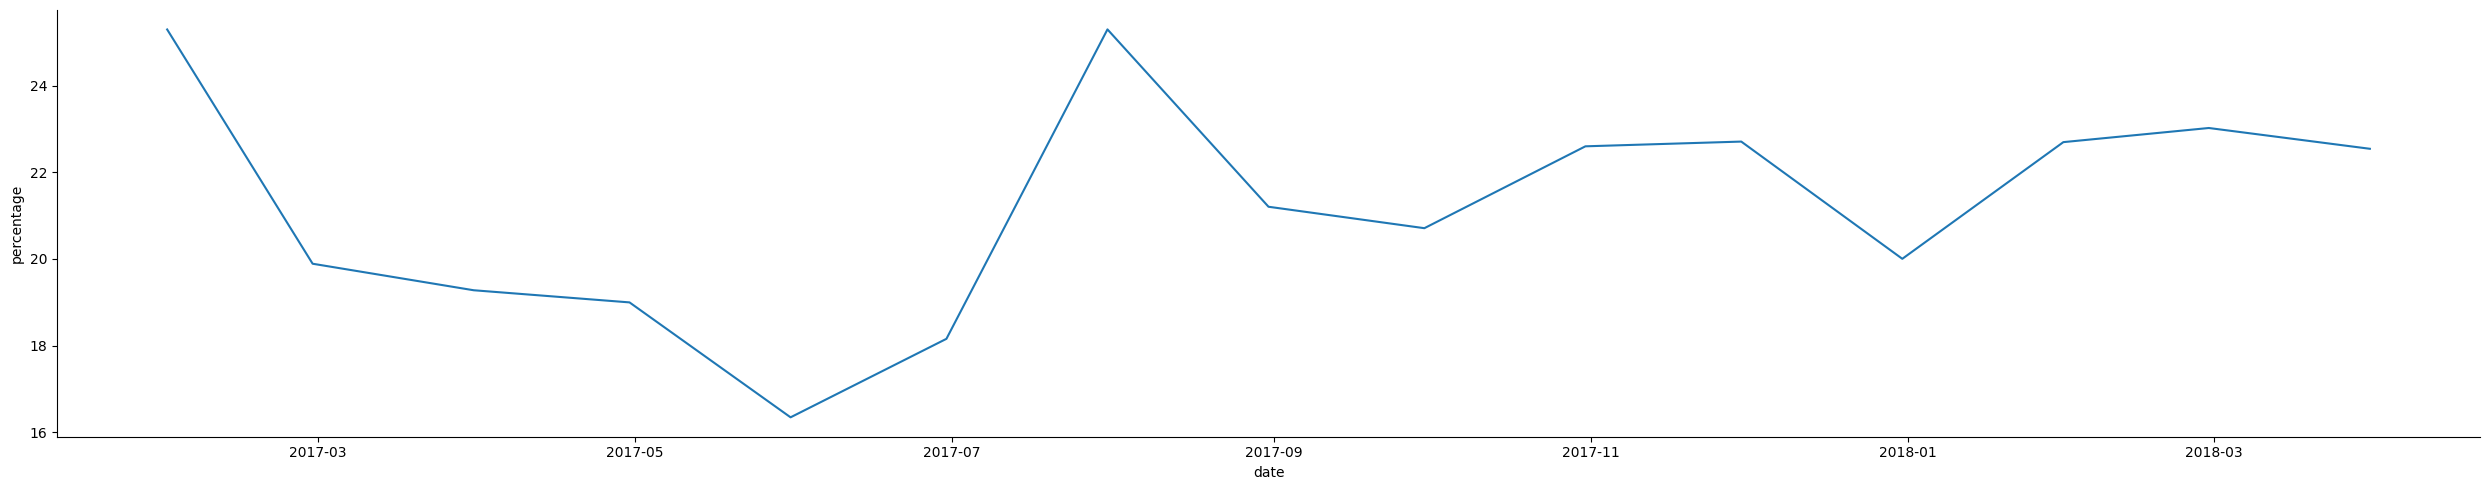

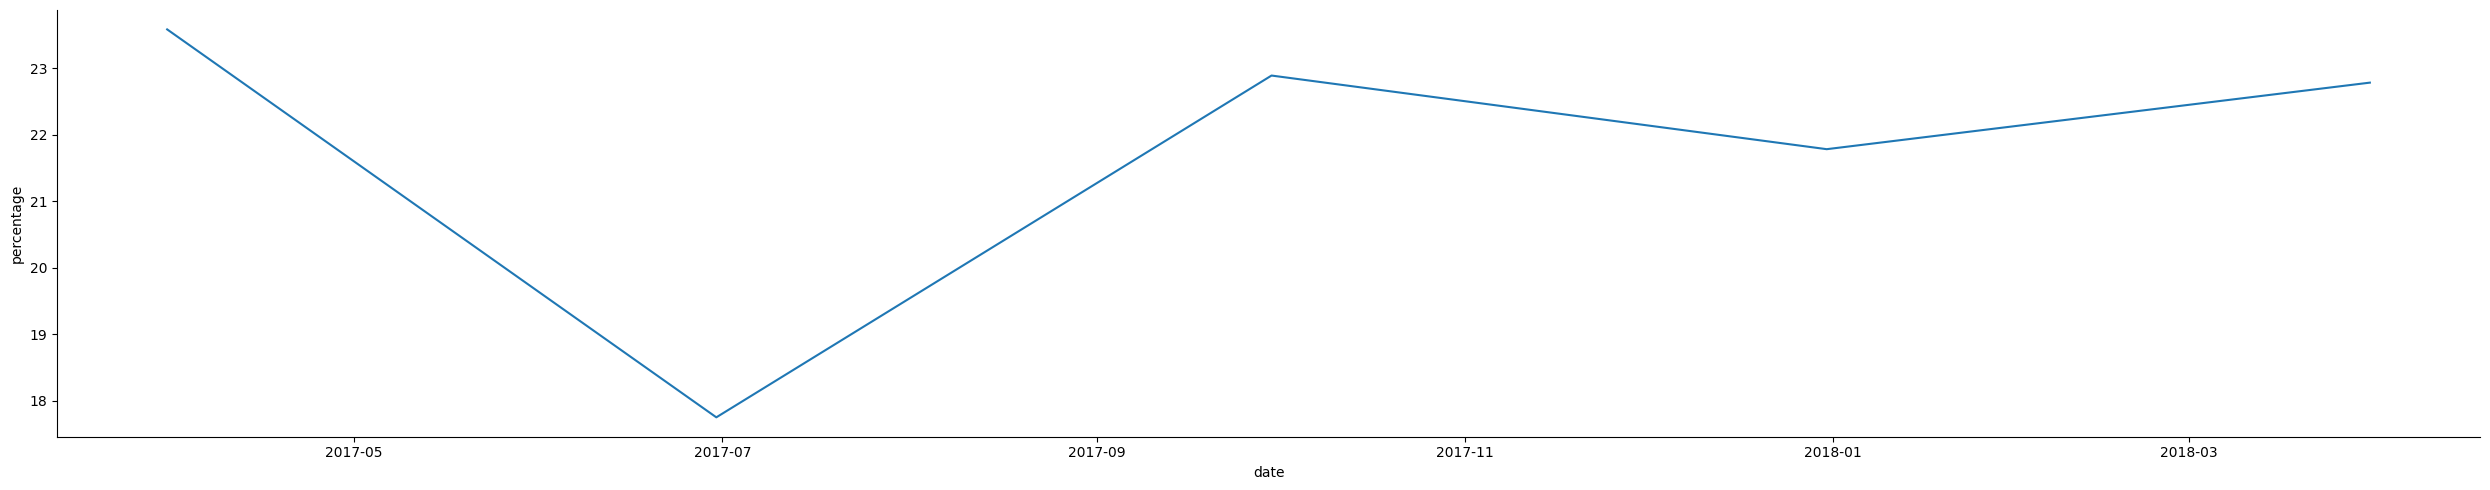

In [117]:
sns.relplot(kind = 'line',
            data = disc_per_day,
            x = 'date',
            y = 'percentage',
            aspect = 5
            );
sns.relplot(kind = 'line',
            data = disc_per_m,
            x = 'date',
            y = 'percentage',
            aspect = 5
            );
sns.relplot(kind = 'line',
            data = disc_per_q,
            x = 'date',
            y = 'percentage',
            aspect = 5
            );

In [118]:
disc_per_m = discounts_df.resample('M', on = 'date').mean()[['discount', 'percentage']]
disc_per_m.reset_index()

,date,discount,percentage
0,2017-01-31,27.638258,25.302254
1,2017-02-28,22.385612,19.890650
2,2017-03-31,16.434932,19.277873
3,2017-04-30,21.993578,18.997309
4,2017-05-31,24.858028,16.342301
5,2017-06-30,27.406369,18.155657
6,2017-07-31,31.783184,25.303897
7,2017-08-31,32.106462,21.206733
8,2017-09-30,28.906737,20.711538
9,2017-10-31,31.845746,22.602874


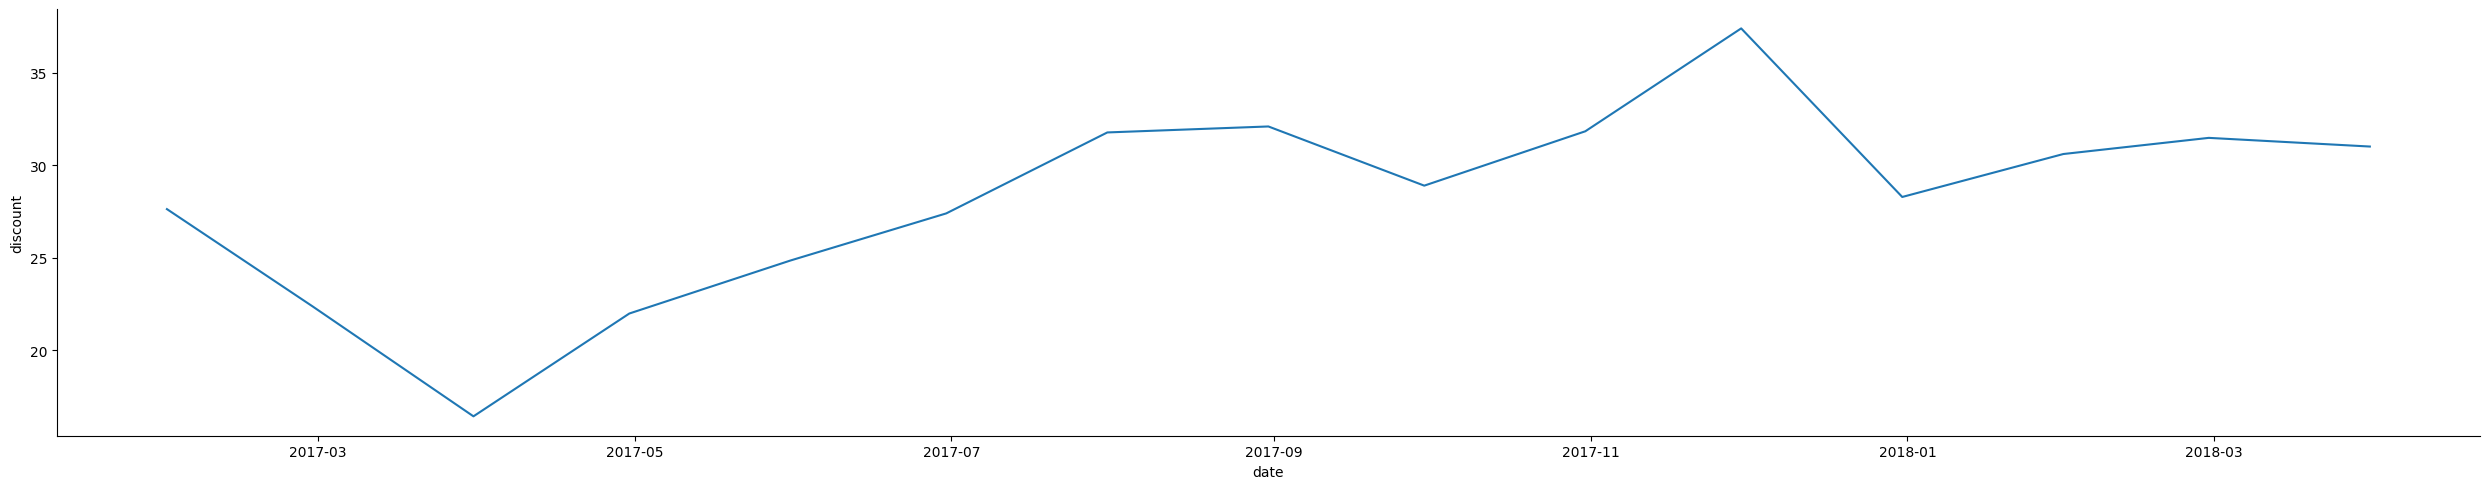

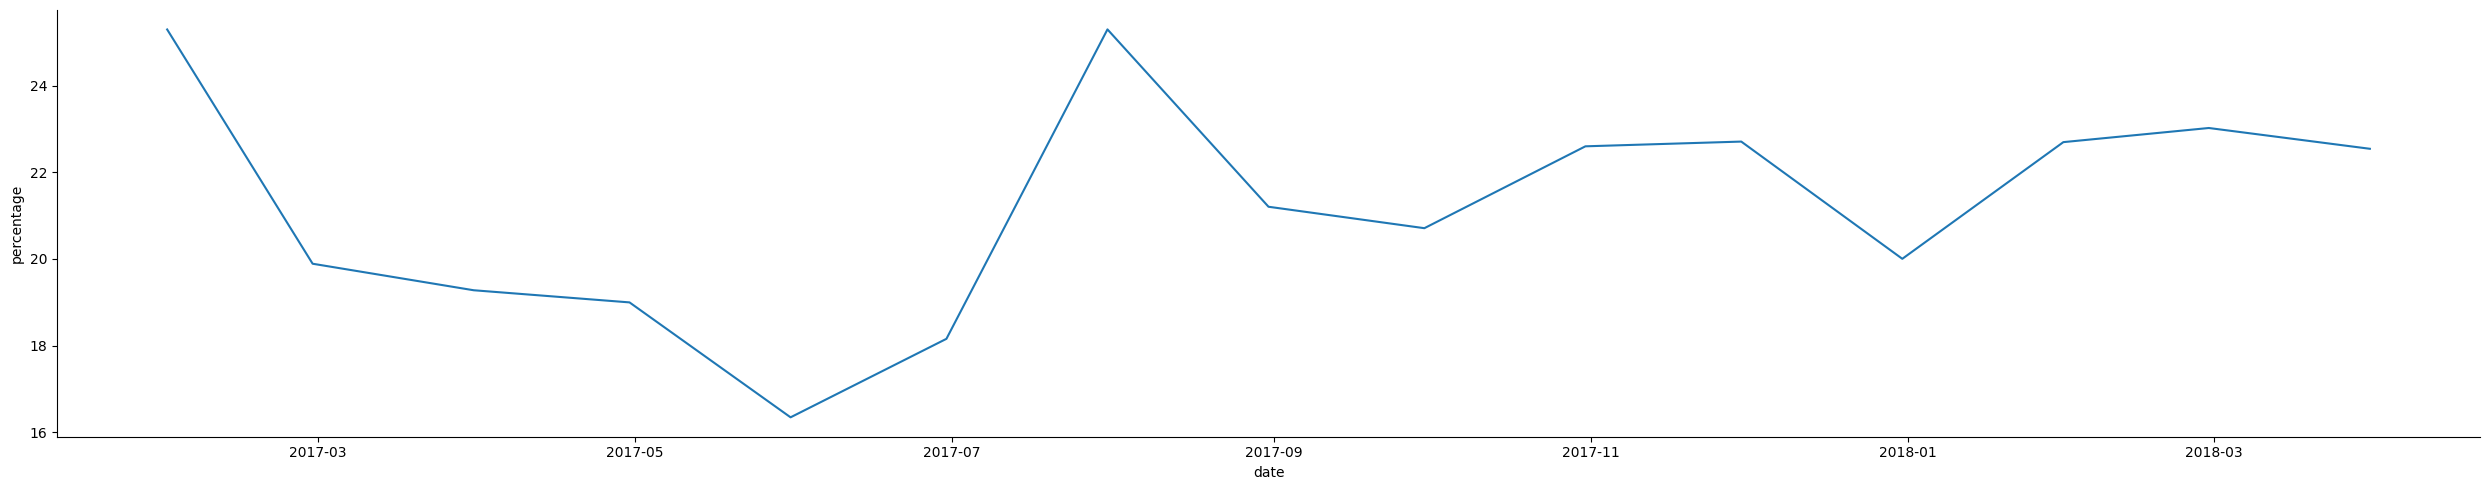

In [119]:
sns.relplot(kind = 'line',
            data = disc_per_m,
            x = 'date',
            y = 'discount',
            aspect = 5
            ),
sns.relplot(kind = 'line',
            data = disc_per_m,
            x = 'date',
            y = 'percentage',
            aspect = 5
            );

In [120]:
import matplotlib.pyplot as plt

In [121]:
price_sold = discounts_df.resample('M', on = 'date').mean()[['price', 'unit_price']]
price_sold.reset_index()

,date,price,unit_price
0,2017-01-31,120.823332,93.185079
1,2017-02-28,137.930461,115.544848
2,2017-03-31,120.067113,103.632172
3,2017-04-30,131.925730,109.932161
4,2017-05-31,158.083000,133.224976
5,2017-06-30,172.166040,144.759671
6,2017-07-31,166.605478,134.822294
7,2017-08-31,160.157237,128.050790
8,2017-09-30,173.857761,144.951030
9,2017-10-31,172.409365,140.563627


In [122]:
discounts_df.unit_price.mean().round(2)

134.33

In [123]:
discounts_df.price.mean().round(2)

164.57

In [124]:
pr_df.price.mean()

662.8839701285856

In [125]:
pr_df.price.mean()

662.8839701285856

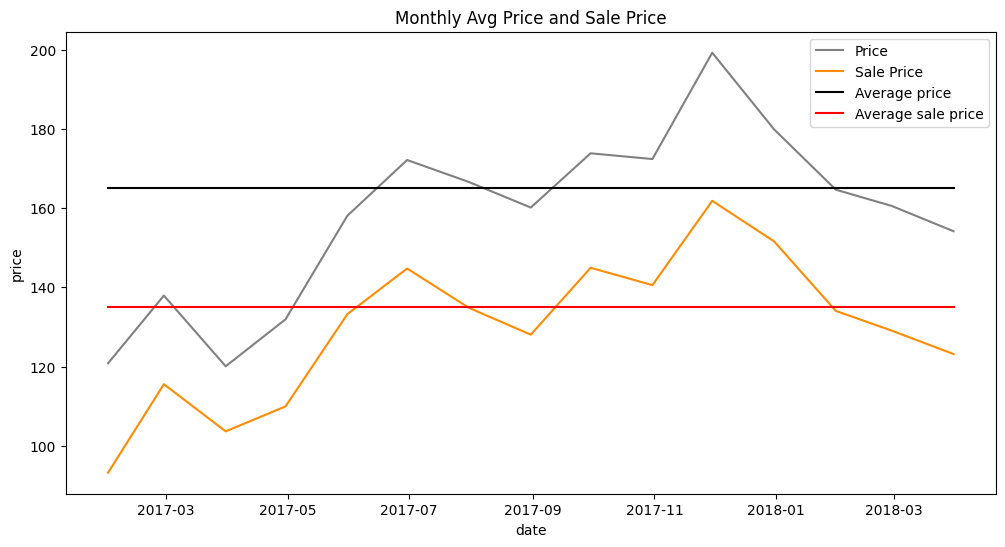

In [126]:
plt.figure(figsize = (12,6))
sns.lineplot(
            data = price_sold,
            x = 'date',
            y = 'price',
            label = 'Price',
            color = 'gray'
            )
sns.lineplot(
            data = price_sold,
            x = 'date',
            y = 'unit_price',
            label = "Sale Price",
            color = 'darkorange'
            );
sns.lineplot(
            data = price_sold,
            x = 'date',
            y = 165,
            label = "Average price",
            color = "black"
            );
sns.lineplot(
            data = price_sold,
            x = 'date',
            y = 135,
            label = "Average sale price",
            color = "red"
            );

# Add plot title
plt.title('Monthly Avg Price and Sale Price');

In [127]:
price_sold_day = discounts_df.resample('D', on = 'date').mean()[['price', 'unit_price']]
price_sold_day.reset_index()

,date,price,unit_price
0,2017-01-01,133.793580,110.112366
1,2017-01-02,116.762943,94.522108
2,2017-01-03,133.470960,110.158700
3,2017-01-04,130.796357,114.850929
4,2017-01-05,127.896217,70.311908
...,...,...,...
433,2018-03-10,132.341923,105.274615
434,2018-03-11,153.413378,122.538243
435,2018-03-12,188.243888,146.622829
436,2018-03-13,153.211505,126.376989


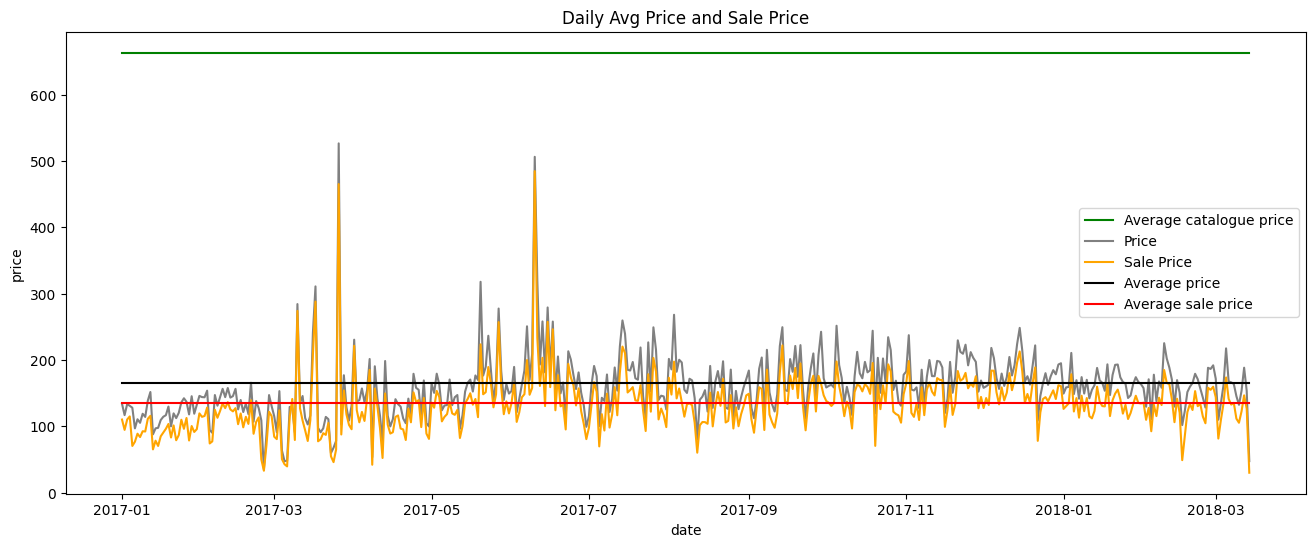

In [128]:
plt.figure(figsize = (16,6))

sns.lineplot(
            data = price_sold_day,
            x = 'date',
            y = 663,
            label = "Average catalogue price",
            color = "green"
            );
sns.lineplot(
            data = price_sold_day,
            x = 'date',
            y = 'price',
            label = 'Price',
            color = 'gray'
            )
sns.lineplot(
            data = price_sold_day,
            x = 'date',
            y = 'unit_price',
            label = "Sale Price",
            color = 'orange'
            );
sns.lineplot(
            data = price_sold_day,
            x = 'date',
            y = 165,
            label = "Average price",
            color = "black"
            );
sns.lineplot(
            data = price_sold_day,
            x = 'date',
            y = 135,
            label = "Average sale price",
            color = "red"
            );

# Add plot title
plt.title('Daily Avg Price and Sale Price');

In [129]:
discounts_df.loc[discounts_df.date.between('2017-03-01', '2017-03-28 23:59:59')].groupby('id_order').nunique().count()

date           149
qty            149
unit_price     149
sku            149
brand          149
revenue        149
name           149
category       149
price          149
promo_price    149
keyword        149
discount       149
percentage     149
dtype: int64

In [130]:
aggressive = discounts_df.query('discount > 50')
moderate = discounts_df.query('discount <= 50 & discount > 15')
low = discounts_df.query('discount <= 15')

In [131]:
# aggressive = aggressive.revenue.sum()
# moderate = moderate.revenue.sum()
# low = low.revenue.sum()

In [132]:
aggressive_he = aggressive.query('price > 500')
aggressive_me = aggressive.query('price <= 500 & price > 250')
aggressive_le = aggressive.query('price <= 250')

moderate_he = moderate.query('price > 500')
moderate_me = moderate.query('price <= 500 & price > 250')
moderate_le = moderate.query('price <= 250')

low_he = low.query('price > 500')
low_me = low.query('price <= 500 & price > 250')
low_le = low.query('price <= 250')

In [133]:
aggressive_he = aggressive_he.revenue.sum()
aggressive_me = aggressive_me.revenue.sum()
aggressive_le = aggressive_le.revenue.sum()

moderate_he = moderate_he.revenue.sum()
moderate_me = moderate_me.revenue.sum()
moderate_le = moderate_le.revenue.sum()

low_he = low_he.revenue.sum()
low_me = low_me.revenue.sum()
low_le = low_le.revenue.sum()

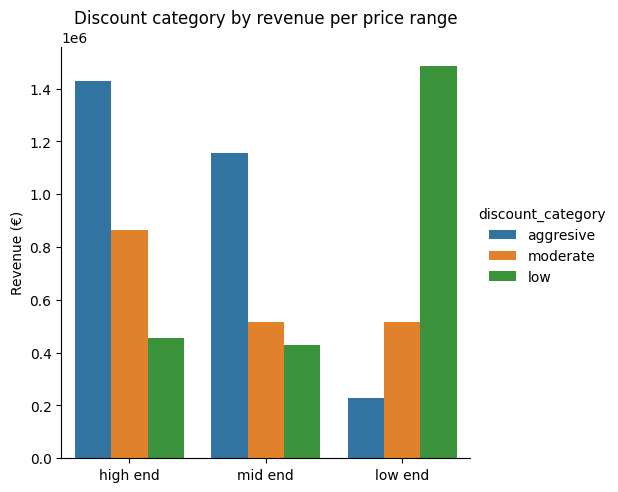

In [134]:
# Create the DataFrame
data = {
    'price_category': ['high end', 'mid end', 'low end', 'high end', 'mid end', 'low end', 'high end', 'mid end', 'low end'],
    'discount_category': ['aggresive', 'aggresive', 'aggresive', 'moderate', 'moderate', 'moderate', 'low', 'low', 'low'],
    'revenue': [aggressive_he, aggressive_me, aggressive_le, moderate_he, moderate_me, moderate_me, low_he, low_me, low_le],
}
df = pd.DataFrame(data)

sns.catplot(kind = 'bar', data = df, x= 'price_category', y= 'revenue', hue= 'discount_category')
plt.ylabel('Revenue (€)')
plt.xlabel('')
plt.title('Discount category by revenue per price range');

In [135]:
# sns.catplot(kind='bar', data=discounts_categories, x= 'price_category', y= 'unitprice', hue= 'discount_category')
# plt.ylabel('Revenue (€)')
# plt.xlabel('')

In [136]:
list_top10cat = list(top10_cat_rev['category'])

In [137]:
pietop10 = discounts_df.loc[discounts_df.category.isin(list_top10cat)]

In [138]:
pietop10_he = pietop10.query('price > 500')
pietop10_me = pietop10.query('price <= 500 & price > 250')
pietop10_le = pietop10.query('price <= 250')

In [139]:
pietop10_he = pietop10_he.revenue.sum()
pietop10_me = pietop10_me.revenue.sum()
pietop10_le = pietop10_le.revenue.sum()

In [140]:
pienontop10 = discounts_df.loc[~discounts_df.category.isin(list_top10cat)]

In [141]:
pienontop10_he = pienontop10.query('price > 500')
pienontop10_me = pienontop10.query('price <= 500 & price > 250')
pienontop10_le = pienontop10.query('price <= 250')

In [142]:
pienontop10_he = pienontop10_he.revenue.sum()
pienontop10_me = pienontop10_me.revenue.sum()
pienontop10_le = pienontop10_le.revenue.sum()

In [145]:
discounts_df.revenue.sum()

8034161.93

In [149]:
discounts_df.groupby('category')['revenue'].sum().nlargest(10).sum() / discounts_df.revenue.sum() * 100

83.81121165677078

In [150]:
(discounts_df.revenue.sum() - discounts_df.groupby('category')['revenue'].sum().nlargest(10).sum()) / discounts_df.revenue.sum() * 100

16.18878834322922

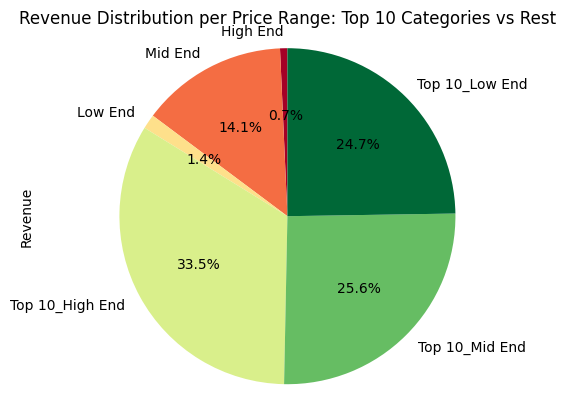

In [143]:
# Create a DataFrame with the data
pie = {
    'Category': ['Top 10', 'Top 10', 'Top 10', 'Rest', 'Rest', 'Rest'],
    'End': ['High End', 'Mid End', 'Low End', 'High End', 'Mid End', 'Low End'],
    'Revenue': [pietop10_he, pietop10_me, pietop10_le, pienontop10_he, pienontop10_me, pienontop10_le]
}
piechart = pd.DataFrame(pie)

# Group the data by Category and End, and calculate the total revenue
grouped = piechart.groupby(['Category', 'End'], as_index = False).sum()

# Reset the index to convert the multi-index DataFrame into a regular DataFrame
# grouped = grouped.reset_index()

# Create a hierarchical index using Category and End columns
grouped.set_index(['Category', 'End'], inplace=True)

sns.color_palette("mako", as_cmap=True)
sns.color_palette("viridis", as_cmap=True)
sns.diverging_palette(145, 300, s=60, as_cmap=True)


labels = ['High End', 'Mid End', 'Low End', 'Top 10_High End', 'Top 10_Mid End', 'Top 10_Low End']

# Plot the pie chart
grouped.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%', startangle=90, cmap = 'RdYlGn', labels = labels)

# Add a title
plt.title('Revenue Distribution per Price Range: Top 10 Categories vs Rest')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [144]:
from google.colab import files
piechart.to_csv("piechart.csv", index=False)
files.download("piechart.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
pie2 = {
    'Category': ['Top 10', 'Top 10', 'Top 10', 'Rest', 'Rest', 'Rest'],
    'End': ['Top 10_High End', 'Top 10_Mid End', 'Top 10_Low End', 'High End', 'Mid End', 'Low End'],
    'Revenue': [pietop10_he, pietop10_me, pietop10_le, pienontop10_he, pienontop10_me, pienontop10_le]
}
piechart2 = pd.DataFrame(pie2)

In [153]:
from google.colab import files
piechart2.to_csv("piechart.csv", index=False)
files.download("piechart.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>